# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
# Dog dataset location : ./dogImages
# human dataset location : ./lfw
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
!unzip lfw.zip

--2020-04-23 18:27:21--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.72
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  13.7MB/s    in 92s     

2020-04-23 18:28:54 (11.7 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Af

  inflating: dogImages/test/014.Basenji/Basenji_01029.jpg  
   creating: dogImages/test/015.Basset_hound/
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01034.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01044.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01059.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01067.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01071.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01080.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01085.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01097.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01106.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01121.jpg  
   creating: dogImages/test/016.Beagle/
  inflating: dogImages/test/016.Beagle/Beagle_01130.jpg  
  inflating: dogImages/test/016.Beagle/Beagle_01141.jpg  
  inflating: dogImages/test/016.Beagle

  inflating: dogImages/test/030.Border_terrier/Border_terrier_02096.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02097.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02110.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02136.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02141.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02148.jpg  
   creating: dogImages/test/031.Borzoi/
  inflating: dogImages/test/031.Borzoi/Borzoi_02154.jpg  
  inflating: dogImages/test/031.Borzoi/Borzoi_02162.jpg  
  inflating: dogImages/test/031.Borzoi/Borzoi_02166.jpg  
  inflating: dogImages/test/031.Borzoi/Borzoi_02181.jpg  
  inflating: dogImages/test/031.Borzoi/Borzoi_02183.jpg  
  inflating: dogImages/test/031.Borzoi/Borzoi_02203.jpg  
  inflating: dogImages/test/031.Borzoi/Borzoi_02220.jpg  
   creating: dogImages/test/032.Boston_terrier/
  inflating: dogImages/test/032.Boston_terrier/Boston_terrier_

  inflating: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03546.jpg  
  inflating: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03555.jpg  
  inflating: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03556.jpg  
  inflating: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03568.jpg  
  inflating: dogImages/test/050.Chinese_shar-pei/Chinese_shar-pei_03580.jpg  
   creating: dogImages/test/051.Chow_chow/
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03591.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03592.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03599.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03608.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03637.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03654.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03660.jpg  
  inflating: dogImages/test/051.Chow_chow/Chow_chow_03664.jpg  
   creating: dogImages/test/052.Clumber_spaniel/
  infl

  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04931.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04938.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04955.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04960.jpg  
  inflating: dogImages/test/071.German_shepherd_dog/German_shepherd_dog_04961.jpg  
   creating: dogImages/test/072.German_shorthaired_pointer/
  inflating: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04970.jpg  
  inflating: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04971.jpg  
  inflating: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04974.jpg  
  inflating: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04980.jpg  
  inflating: dogImages/test/072.German_shorthaired_pointer/German_shorthaired_pointer_04981.jpg  
  inflating: dogImages/test/07

  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06063.jpg  
  inflating: dogImages/test/089.Irish_wolfhound/Irish_wolfhound_06071.jpg  
   creating: dogImages/test/090.Italian_greyhound/
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06114.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06115.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06117.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06119.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06137.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06146.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06149.jpg  
  inflating: dogImages/test/090.Italian_greyhound/Italian_greyhound_06153.jpg  
   creating: dogImages/test/091.Japanese_chin/
  inflating: dogImages/test/091.Japanese_chin/Japanese_chin_06166.jpg  
  inflating: dogImages/test/091.Japane

  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07376.jpg  
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07390.jpg  
  inflating: dogImages/test/113.Old_english_sheepdog/Old_english_sheepdog_07391.jpg  
   creating: dogImages/test/114.Otterhound/
  inflating: dogImages/test/114.Otterhound/Otterhound_07394.jpg  
  inflating: dogImages/test/114.Otterhound/Otterhound_07405.jpg  
  inflating: dogImages/test/114.Otterhound/Otterhound_07430.jpg  
  inflating: dogImages/test/114.Otterhound/Otterhound_07435.jpg  
   creating: dogImages/test/115.Papillon/
  inflating: dogImages/test/115.Papillon/Papillon_07440.jpg  
  inflating: dogImages/test/115.Papillon/Papillon_07451.jpg  
  inflating: dogImages/test/115.Papillon/Papillon_07454.jpg  
  inflating: dogImages/test/115.Papillon/Papillon_07461.jpg  
  inflating: dogImages/test/115.Papillon/Papillon_07466.jpg  
  inflating: dogImages/test/115.Papillon/Papillon_07480.jpg  
  inflating: dogImag

  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00079.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00080.jpg  
   creating: dogImages/train/002.Afghan_hound/
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00081.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00082.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00083.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00084.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00085.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00086.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00087.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00088.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00089.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00090.jpg  
  inflating: dogImages/train/002.Afghan_hound/Afghan_hound_00091.jpg  
  inflating: dogImages/tra

  inflating: dogImages/train/004.Akita/Akita_00240.jpg  
  inflating: dogImages/train/004.Akita/Akita_00241.jpg  
  inflating: dogImages/train/004.Akita/Akita_00242.jpg  
  inflating: dogImages/train/004.Akita/Akita_00243.jpg  
  inflating: dogImages/train/004.Akita/Akita_00245.jpg  
  inflating: dogImages/train/004.Akita/Akita_00246.jpg  
  inflating: dogImages/train/004.Akita/Akita_00248.jpg  
  inflating: dogImages/train/004.Akita/Akita_00249.jpg  
  inflating: dogImages/train/004.Akita/Akita_00250.jpg  
  inflating: dogImages/train/004.Akita/Akita_00251.jpg  
  inflating: dogImages/train/004.Akita/Akita_00253.jpg  
  inflating: dogImages/train/004.Akita/Akita_00254.jpg  
  inflating: dogImages/train/004.Akita/Akita_00255.jpg  
  inflating: dogImages/train/004.Akita/Akita_00256.jpg  
  inflating: dogImages/train/004.Akita/Akita_00257.jpg  
  inflating: dogImages/train/004.Akita/Akita_00259.jpg  
  inflating: dogImages/train/004.Akita/Akita_00260.jpg  
  inflating: dogImages/train/00

  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00385.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00388.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00389.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00391.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00392.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00393.jpg  
   creating: dogImages/train/006.American_eskimo_dog/
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00394.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00395.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00396.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00397.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00398.jpg  
  inflating: dogImages/train/006.American_eskim

  inflating: dogImages/train/007.American_foxhound/American_foxhound_00528.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00529.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00530.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00532.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00533.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00534.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00536.jpg  
   creating: dogImages/train/008.American_staffordshire_terrier/
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00537.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00541.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00542.jpg  
  inflating: dogImages/train/008.American_staff

  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00668.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00670.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00672.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00675.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00676.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00677.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00678.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00679.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00680.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00681.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00683.jpg  

  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00797.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00800.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00801.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00802.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00804.jpg  
  inflating: dogImages/train/011.Australian_cattle_dog/Australian_cattle_dog_00805.jpg  
   creating: dogImages/train/012.Australian_shepherd/
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00806.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00807.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00809.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00810.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd

  inflating: dogImages/train/014.Basenji/Basenji_00947.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00948.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00949.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00952.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00953.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00954.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00956.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00957.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00958.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00962.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00963.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00965.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00966.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00968.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00969.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00970.jpg  
  inflating: dogImages/t

  inflating: dogImages/train/016.Beagle/Beagle_01175.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01177.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01178.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01179.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01180.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01181.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01182.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01185.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01186.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01188.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01189.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01190.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01191.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01192.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01193.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01194.jpg  
  inflating: dogImages/train/016.Beagle/Beagle_01195.jpg

  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01343.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01344.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01345.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01346.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01349.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01350.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01351.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01352.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01353.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01354.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01355.jpg  
  inflating: dogImages/train/019.Bedlington_terrier/Bedlington_terrier_01356.jpg  
  in

  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01481.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01483.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01484.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01487.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01492.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01493.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01494.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01495.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01496.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01497.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01498.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01499.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Be

  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01658.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01659.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01660.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01662.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01663.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01664.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01665.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01666.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01667.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01668.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01669.jpg  
  inflating: dogImages/train/023.Bernese_mo

  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01835.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01836.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01838.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01841.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01842.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01843.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01844.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01845.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01846.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01847.jpg  
  inflating: dogImages/train/026.Black_russian_terrier/Black_russian_terrier_01848.jpg  
  inflating: dogImage

  inflating: dogImages/train/029.Border_collie/Border_collie_02012.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02013.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02014.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02015.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02016.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02017.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02018.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02019.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02020.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02021.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02022.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02023.jpg  
  inflating: dogImages/train/029.Border_collie/Border_collie_02024.jpg  
  inflating: dogImages/train/029.Border_collie/Bord

  inflating: dogImages/train/031.Borzoi/Borzoi_02198.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02199.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02200.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02201.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02202.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02204.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02205.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02206.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02207.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02208.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02209.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02210.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02212.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02213.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02214.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02215.jpg  
  inflating: dogImages/train/031.Borzoi/Borzoi_02217.jpg

  inflating: dogImages/train/034.Boxer/Boxer_02382.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02383.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02385.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02386.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02387.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02388.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02389.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02390.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02391.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02393.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02394.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02395.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02396.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02398.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02399.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02400.jpg  
  inflating: dogImages/train/034.Boxer/Boxer_02401.jpg  
  inflating: dogImages/train/03

  inflating: dogImages/train/036.Briard/Briard_02563.jpg  
  inflating: dogImages/train/036.Briard/Briard_02564.jpg  
  inflating: dogImages/train/036.Briard/Briard_02565.jpg  
  inflating: dogImages/train/036.Briard/Briard_02566.jpg  
  inflating: dogImages/train/036.Briard/Briard_02567.jpg  
  inflating: dogImages/train/036.Briard/Briard_02568.jpg  
  inflating: dogImages/train/036.Briard/Briard_02569.jpg  
  inflating: dogImages/train/036.Briard/Briard_02570.jpg  
  inflating: dogImages/train/036.Briard/Briard_02571.jpg  
  inflating: dogImages/train/036.Briard/Briard_02572.jpg  
  inflating: dogImages/train/036.Briard/Briard_02573.jpg  
  inflating: dogImages/train/036.Briard/Briard_02576.jpg  
  inflating: dogImages/train/036.Briard/Briard_02577.jpg  
  inflating: dogImages/train/036.Briard/Briard_02578.jpg  
  inflating: dogImages/train/036.Briard/Briard_02579.jpg  
  inflating: dogImages/train/036.Briard/Briard_02580.jpg  
  inflating: dogImages/train/036.Briard/Briard_02581.jpg

  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02738.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02739.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02740.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02741.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02742.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02743.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02744.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02746.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02748.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02749.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02751.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02752.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02753.jpg  
  inflating: dogImages/train/039.Bull_terrier/Bull_terrier_02754.jpg  
  infl

  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02894.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02895.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02896.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02898.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02899.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02900.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02901.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02902.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02903.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02906.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02907.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02908.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02909.jpg  
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02910.jpg  
  inflating: dogImages/train/041.B

  inflating: dogImages/train/044.Cane_corso/Cane_corso_03100.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03101.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03102.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03105.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03106.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03107.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03108.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03109.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03111.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03112.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03113.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03115.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03116.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03118.jpg  
  inflating: dogImages/train/044.Cane_corso/Cane_corso_03119.j

  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03235.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03236.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03237.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03238.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03242.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03243.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03244.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03245.jpg  
   creating: dogImages/train/046.Cavalier_king_charles_spaniel/
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03246.jpg  
  inflating: dogImages/train/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03247.jpg  
  inflating: dogImages/train/0

  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03346.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03347.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03348.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03349.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03350.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03351.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03352.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03353.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03354.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03355.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_re

  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03542.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03543.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03544.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03545.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03547.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03548.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03549.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03550.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03551.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03552.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03553.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03554.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Ch

  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03720.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03721.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03722.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03723.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03725.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03726.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03727.jpg  
  inflating: dogImages/train/052.Clumber_spaniel/Clumber_spaniel_03728.jpg  
   creating: dogImages/train/053.Cocker_spaniel/
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03729.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03730.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03731.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03732.jpg  
  inflating: dogImages/train/053.Co

  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03900.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03902.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03903.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03904.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03905.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03906.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03907.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03908.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03909.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03910.jpg  
  inflating: dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03911.jpg  

  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04128.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04129.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04130.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04132.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04133.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04135.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04136.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04137.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04139.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04140.jpg  
  inflating: dogImages/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04141.jpg  

  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04287.jpg  
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04288.jpg  
  inflating: dogImages/train/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04289.jpg  
   creating: dogImages/train/061.English_cocker_spaniel/
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04290.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04291.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04292.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04293.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04294.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04296.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04297.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English

  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04480.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04481.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04482.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04483.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04485.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04487.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04488.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04489.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04490.jpg  
  inflating: dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04492.jpg  
  inflating: dogImages/train/063.English_springer_

  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04655.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04656.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04657.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04658.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04659.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04660.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04662.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04663.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04664.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04665.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04667.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04668.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finnish_spitz_04669.jpg  
  inflating: dogImages/train/067.Finnish_spitz/Finn

  inflating: dogImages/train/069.French_bulldog/French_bulldog_04815.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04817.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04818.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04819.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04820.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04821.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04823.jpg  
  inflating: dogImages/train/069.French_bulldog/French_bulldog_04825.jpg  
   creating: dogImages/train/070.German_pinscher/
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04826.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04827.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04828.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04829.jpg  
  inflating: dogImages/train/070.German_pi

  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04959.jpg  
  inflating: dogImages/train/071.German_shepherd_dog/German_shepherd_dog_04962.jpg  
   creating: dogImages/train/072.German_shorthaired_pointer/
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04963.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04964.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04968.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04969.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04972.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04973.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthaired_pointer_04975.jpg  
  inflating: dogImages/train/072.German_shorthaired_pointer/German_shorthair

  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05079.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05080.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05081.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05082.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05083.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05084.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05085.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05086.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05087.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05088.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05090.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05091.jpg  
  inflating: dogImages/train/074.Giant_schnauzer/Giant_schnauzer_05092.jpg  

  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05242.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05243.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05244.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05246.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05247.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05249.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05252.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05253.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05254.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05255.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05257.jpg  
  inflating: dogImages/train/076.Golden_retriever/Golden_retriever_05259.jpg  
  inflating: dogImages/train/076.Golden_retriever/Go

  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05393.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05394.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05396.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05397.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05398.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05399.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05400.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05401.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05402.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05404.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05405.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05407.jpg  
  inflating: dogImages/train/079.Great_pyrenees/Great_pyrenees_05408.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/081.Greyhound/Greyhound_05514.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05515.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05516.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05517.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05518.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05519.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05520.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05522.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05524.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05525.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05527.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05529.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05532.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05533.jpg  
  inflating: dogImages/train/081.Greyhound/Greyhound_05534.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05734.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05735.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05736.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05737.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05739.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05741.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05743.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05744.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05745.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05747.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05748.jpg  
  inflating: dogImages/train/084.Icelandic_sheepdog/Icelandic_sheepdog_05750.jpg  
  in

  inflating: dogImages/train/086.Irish_setter/Irish_setter_05863.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05865.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05866.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05867.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05868.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05869.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05870.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05871.jpg  
  inflating: dogImages/train/086.Irish_setter/Irish_setter_05872.jpg  
   creating: dogImages/train/087.Irish_terrier/
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05874.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05875.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05876.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05877.jpg  
  inflating: dogImage

  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06015.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06017.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06018.jpg  
  inflating: dogImages/train/088.Irish_water_spaniel/Irish_water_spaniel_06019.jpg  
   creating: dogImages/train/089.Irish_wolfhound/
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06020.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06021.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06023.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06024.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06025.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06026.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06027.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06028.

  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06176.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06177.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06178.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06180.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06182.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06183.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06185.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06186.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06187.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06188.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06189.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06190.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06191.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japa

  inflating: dogImages/train/094.Komondor/Komondor_06354.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06355.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06356.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06357.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06358.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06359.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06360.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06361.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06362.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06363.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06365.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06367.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06368.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06369.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_06370.jpg  
  inflating: dogImages/train/094.Komondor/Komondor_0637

  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06532.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06533.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06534.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06535.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06536.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06537.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06538.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06540.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06541.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06543.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06544.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/Lakeland_terrier_06545.jpg  
  inflating: dogImages/train/097.Lakeland_terrier/La

  inflating: dogImages/train/100.Lowchen/Lowchen_06701.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06702.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06703.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06704.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06705.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06706.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06707.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06709.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06710.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06711.jpg  
  inflating: dogImages/train/100.Lowchen/Lowchen_06712.jpg  
   creating: dogImages/train/101.Maltese/
  inflating: dogImages/train/101.Maltese/Maltese_06713.jpg  
  inflating: dogImages/train/101.Maltese/Maltese_06714.jpg  
  inflating: dogImages/train/101.Maltese/Maltese_06715.jpg  
  inflating: dogImages/train/101.Maltese/Maltese_06717.jpg  
  inflating: dogImages/train/101.Maltese/Ma

  inflating: dogImages/train/103.Mastiff/Mastiff_06875.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06876.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06877.jpg  
  inflating: dogImages/train/103.Mastiff/Mastiff_06879.jpg  
   creating: dogImages/train/104.Miniature_schnauzer/
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06881.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06882.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06883.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06884.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06885.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06886.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06887.jpg  
  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06888.jpg  
  inflating: dogImages

  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07050.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07051.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07053.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07055.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07057.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07058.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07060.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07061.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07062.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07063.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07064.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07065.jpg  
  inflating: dogImages/train/107.Norfolk_terrier/Norfolk_terrier_07066.jpg  

  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07200.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07202.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07204.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07206.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07207.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07208.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07209.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07210.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07211.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07212.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lundehund_07213.jpg  
  inflating: dogImages/train/110.Norwegian_lundehund/Norwegian_lu

  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07360.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07361.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07362.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07363.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07364.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07365.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07367.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07368.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07369.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07370.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07371.jpg  
  inflating: dogImages/train/113.Old_englis

  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07522.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07523.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07524.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07525.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07526.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07527.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07528.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07530.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07532.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07533.jpg  
  inflating: dogImages/train/116.Parson_russell_terrier/Parson_russell_terrier_07534.jpg  

  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07696.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07697.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07698.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07699.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07700.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07701.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07702.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07704.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basset_griffon_vendeen_07705.jpg  
  inflating: dogImages/train/119.Petit_basset_griffon_vendeen/Petit_basse

  inflating: dogImages/train/122.Pointer/Pointer_07843.jpg  
   creating: dogImages/train/123.Pomeranian/
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07844.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07845.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07846.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07847.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07848.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07849.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07850.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07851.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07852.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07854.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07855.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07856.jpg  
  inflating: dogImages/train/123.Pomeranian/Pomeranian_07859.jpg  
  inflating: dogImages/

  inflating: dogImages/train/125.Portuguese_water_dog/Portuguese_water_dog_08001.jpg  
   creating: dogImages/train/126.Saint_bernard/
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08003.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08004.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08005.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08006.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08007.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08008.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08009.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08010.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08013.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08014.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_08015.jpg  
  inflating: dogImages/train/126.Saint_bernard/Saint_bernard_0

  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08164.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08165.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08166.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08167.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08168.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08169.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08172.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08175.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08176.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08177.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08178.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08179.jpg  
  inflating: dogImages/train/129.Tibetan_mastiff/Tibetan_mastiff_08180.jpg  

  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08292.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08293.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08295.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08296.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08297.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08300.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08302.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08303.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08305.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08306.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08307.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08308.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08309.jpg  
  inflating: dogImages/tr

  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00822.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00827.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00847.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00867.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00873.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00879.jpg  
   creating: dogImages/valid/013.Australian_terrier/
  inflating: dogImages/valid/013.Australian_terrier/Australian_terrier_00893.jpg  
  inflating: dogImages/valid/013.Australian_terrier/Australian_terrier_00896.jpg  
  inflating: dogImages/valid/013.Australian_terrier/Australian_terrier_00913.jpg  
  inflating: dogImages/valid/013.Australian_terrier/Australian_terrier_00914.jpg  
  inflating: dogImages/valid/013.Australian_terrier/Australian_terrier_00927.jpg  
  inflating: dogImages

  inflating: dogImages/valid/029.Border_collie/Border_collie_02054.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02078.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02085.jpg  
   creating: dogImages/valid/030.Border_terrier/
  inflating: dogImages/valid/030.Border_terrier/Border_terrier_02100.jpg  
  inflating: dogImages/valid/030.Border_terrier/Border_terrier_02118.jpg  
  inflating: dogImages/valid/030.Border_terrier/Border_terrier_02126.jpg  
  inflating: dogImages/valid/030.Border_terrier/Border_terrier_02130.jpg  
  inflating: dogImages/valid/030.Border_terrier/Border_terrier_02146.jpg  
  inflating: dogImages/valid/030.Border_terrier/Border_terrier_02151.jpg  
   creating: dogImages/valid/031.Borzoi/
  inflating: dogImages/valid/031.Borzoi/Borzoi_02173.jpg  
  inflating: dogImages/valid/031.Borzoi/Borzoi_02178.jpg  
  inflating: dogImages/valid/031.Borzoi/Borzoi_02182.jpg  
  inflating: dogImages/valid/031.Borzoi/Borzoi_02193.jpg  
  inf

  inflating: dogImages/valid/050.Chinese_shar-pei/Chinese_shar-pei_03540.jpg  
  inflating: dogImages/valid/050.Chinese_shar-pei/Chinese_shar-pei_03562.jpg  
  inflating: dogImages/valid/050.Chinese_shar-pei/Chinese_shar-pei_03566.jpg  
  inflating: dogImages/valid/050.Chinese_shar-pei/Chinese_shar-pei_03575.jpg  
   creating: dogImages/valid/051.Chow_chow/
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03606.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03612.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03624.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03628.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03629.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03636.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03657.jpg  
  inflating: dogImages/valid/051.Chow_chow/Chow_chow_03661.jpg  
   creating: dogImages/valid/052.Clumber_spaniel/
  inflating: dogImages/valid/052.Clumber_spaniel/Clumber_spaniel_03670

  inflating: dogImages/valid/066.Field_spaniel/Field_spaniel_04610.jpg  
  inflating: dogImages/valid/066.Field_spaniel/Field_spaniel_04611.jpg  
  inflating: dogImages/valid/066.Field_spaniel/Field_spaniel_04614.jpg  
   creating: dogImages/valid/067.Finnish_spitz/
  inflating: dogImages/valid/067.Finnish_spitz/Finnish_spitz_04650.jpg  
  inflating: dogImages/valid/067.Finnish_spitz/Finnish_spitz_04652.jpg  
  inflating: dogImages/valid/067.Finnish_spitz/Finnish_spitz_04666.jpg  
  inflating: dogImages/valid/067.Finnish_spitz/Finnish_spitz_04676.jpg  
   creating: dogImages/valid/068.Flat-coated_retriever/
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04683.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04685.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04694.jpg  
  inflating: dogImages/valid/068.Flat-coated_retriever/Flat-coated_retriever_04699.jpg  
  inflating: dogImages/valid/

  inflating: dogImages/valid/082.Havanese/Havanese_05626.jpg  
  inflating: dogImages/valid/082.Havanese/Havanese_05637.jpg  
  inflating: dogImages/valid/082.Havanese/Havanese_05641.jpg  
   creating: dogImages/valid/083.Ibizan_hound/
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05647.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05653.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05659.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05673.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05675.jpg  
  inflating: dogImages/valid/083.Ibizan_hound/Ibizan_hound_05676.jpg  
   creating: dogImages/valid/084.Icelandic_sheepdog/
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05713.jpg  
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05738.jpg  
  inflating: dogImages/valid/084.Icelandic_sheepdog/Icelandic_sheepdog_05740.jpg  
  inflating: dogImages/valid/084.Ice

  inflating: dogImages/valid/098.Leonberger/Leonberger_06588.jpg  
  inflating: dogImages/valid/098.Leonberger/Leonberger_06591.jpg  
  inflating: dogImages/valid/098.Leonberger/Leonberger_06595.jpg  
   creating: dogImages/valid/099.Lhasa_apso/
  inflating: dogImages/valid/099.Lhasa_apso/Lhasa_apso_06624.jpg  
  inflating: dogImages/valid/099.Lhasa_apso/Lhasa_apso_06638.jpg  
  inflating: dogImages/valid/099.Lhasa_apso/Lhasa_apso_06645.jpg  
  inflating: dogImages/valid/099.Lhasa_apso/Lhasa_apso_06649.jpg  
  inflating: dogImages/valid/099.Lhasa_apso/Lhasa_apso_06660.jpg  
  inflating: dogImages/valid/099.Lhasa_apso/Lhasa_apso_06669.jpg  
   creating: dogImages/valid/100.Lowchen/
  inflating: dogImages/valid/100.Lowchen/Lowchen_06674.jpg  
  inflating: dogImages/valid/100.Lowchen/Lowchen_06682.jpg  
  inflating: dogImages/valid/100.Lowchen/Lowchen_06684.jpg  
  inflating: dogImages/valid/100.Lowchen/Lowchen_06708.jpg  
   creating: dogImages/valid/101.Maltese/
  inflating: dogImages/v

  inflating: dogImages/valid/120.Pharaoh_hound/Pharaoh_hound_07730.jpg  
  inflating: dogImages/valid/120.Pharaoh_hound/Pharaoh_hound_07744.jpg  
  inflating: dogImages/valid/120.Pharaoh_hound/Pharaoh_hound_07752.jpg  
  inflating: dogImages/valid/120.Pharaoh_hound/Pharaoh_hound_07758.jpg  
   creating: dogImages/valid/121.Plott/
  inflating: dogImages/valid/121.Plott/Plott_07771.jpg  
  inflating: dogImages/valid/121.Plott/Plott_07780.jpg  
  inflating: dogImages/valid/121.Plott/Plott_07796.jpg  
  inflating: dogImages/valid/121.Plott/Plott_07802.jpg  
   creating: dogImages/valid/122.Pointer/
  inflating: dogImages/valid/122.Pointer/Pointer_07808.jpg  
  inflating: dogImages/valid/122.Pointer/Pointer_07826.jpg  
  inflating: dogImages/valid/122.Pointer/Pointer_07831.jpg  
  inflating: dogImages/valid/122.Pointer/Pointer_07834.jpg  
   creating: dogImages/valid/123.Pomeranian/
  inflating: dogImages/valid/123.Pomeranian/Pomeranian_07853.jpg  
  inflating: dogImages/valid/123.Pomerania

  inflating: lfw/Akhmed_Zakayev/Akhmed_Zakayev_0003.jpg  
  inflating: __MACOSX/lfw/Akhmed_Zakayev/._Akhmed_Zakayev_0003.jpg  
  inflating: __MACOSX/lfw/._Akhmed_Zakayev  
   creating: lfw/Akiko_Morigami/
  inflating: lfw/Akiko_Morigami/Akiko_Morigami_0001.jpg  
   creating: __MACOSX/lfw/Akiko_Morigami/
  inflating: __MACOSX/lfw/Akiko_Morigami/._Akiko_Morigami_0001.jpg  
  inflating: __MACOSX/lfw/._Akiko_Morigami  
   creating: lfw/Akmal_Taher/
  inflating: lfw/Akmal_Taher/Akmal_Taher_0001.jpg  
   creating: __MACOSX/lfw/Akmal_Taher/
  inflating: __MACOSX/lfw/Akmal_Taher/._Akmal_Taher_0001.jpg  
  inflating: __MACOSX/lfw/._Akmal_Taher  
   creating: lfw/Al_Cardenas/
  inflating: lfw/Al_Cardenas/Al_Cardenas_0001.jpg  
   creating: __MACOSX/lfw/Al_Cardenas/
  inflating: __MACOSX/lfw/Al_Cardenas/._Al_Cardenas_0001.jpg  
  inflating: __MACOSX/lfw/._Al_Cardenas  
   creating: lfw/Al_Davis/
  inflating: lfw/Al_Davis/Al_Davis_0001.jpg  
   creating: __MACOSX/lfw/Al_Davis/
  inflating: __MACOS

   creating: __MACOSX/lfw/Ali_Hammoud/
  inflating: __MACOSX/lfw/Ali_Hammoud/._Ali_Hammoud_0001.jpg  
  inflating: __MACOSX/lfw/._Ali_Hammoud  
   creating: lfw/Ali_Khamenei/
  inflating: lfw/Ali_Khamenei/Ali_Khamenei_0001.jpg  
   creating: __MACOSX/lfw/Ali_Khamenei/
  inflating: __MACOSX/lfw/Ali_Khamenei/._Ali_Khamenei_0001.jpg  
  inflating: lfw/Ali_Khamenei/Ali_Khamenei_0002.jpg  
  inflating: __MACOSX/lfw/Ali_Khamenei/._Ali_Khamenei_0002.jpg  
  inflating: lfw/Ali_Khamenei/Ali_Khamenei_0003.jpg  
  inflating: __MACOSX/lfw/Ali_Khamenei/._Ali_Khamenei_0003.jpg  
  inflating: __MACOSX/lfw/._Ali_Khamenei  
   creating: lfw/Ali_Mohammed_Maher/
  inflating: lfw/Ali_Mohammed_Maher/Ali_Mohammed_Maher_0001.jpg  
   creating: __MACOSX/lfw/Ali_Mohammed_Maher/
  inflating: __MACOSX/lfw/Ali_Mohammed_Maher/._Ali_Mohammed_Maher_0001.jpg  
  inflating: __MACOSX/lfw/._Ali_Mohammed_Maher  
   creating: lfw/Ali_Naimi/
  inflating: lfw/Ali_Naimi/Ali_Naimi_0001.jpg  
   creating: __MACOSX/lfw/Ali_Naim

  inflating: lfw/Andre_Agassi/Andre_Agassi_0032.jpg  
  inflating: __MACOSX/lfw/Andre_Agassi/._Andre_Agassi_0032.jpg  
  inflating: lfw/Andre_Agassi/Andre_Agassi_0033.jpg  
  inflating: __MACOSX/lfw/Andre_Agassi/._Andre_Agassi_0033.jpg  
  inflating: lfw/Andre_Agassi/Andre_Agassi_0034.jpg  
  inflating: __MACOSX/lfw/Andre_Agassi/._Andre_Agassi_0034.jpg  
  inflating: lfw/Andre_Agassi/Andre_Agassi_0035.jpg  
  inflating: __MACOSX/lfw/Andre_Agassi/._Andre_Agassi_0035.jpg  
  inflating: lfw/Andre_Agassi/Andre_Agassi_0036.jpg  
  inflating: __MACOSX/lfw/Andre_Agassi/._Andre_Agassi_0036.jpg  
  inflating: __MACOSX/lfw/._Andre_Agassi  
   creating: lfw/Andre_Bucher/
  inflating: lfw/Andre_Bucher/Andre_Bucher_0001.jpg  
   creating: __MACOSX/lfw/Andre_Bucher/
  inflating: __MACOSX/lfw/Andre_Bucher/._Andre_Bucher_0001.jpg  
  inflating: __MACOSX/lfw/._Andre_Bucher  
   creating: lfw/Andre_Lange/
  inflating: lfw/Andre_Lange/Andre_Lange_0001.jpg  
   creating: __MACOSX/lfw/Andre_Lange/
  inflat

  inflating: lfw/Anthony_Scott_Miller/Anthony_Scott_Miller_0001.jpg  
   creating: __MACOSX/lfw/Anthony_Scott_Miller/
  inflating: __MACOSX/lfw/Anthony_Scott_Miller/._Anthony_Scott_Miller_0001.jpg  
  inflating: __MACOSX/lfw/._Anthony_Scott_Miller  
   creating: lfw/Antje_Buschschulte/
  inflating: lfw/Antje_Buschschulte/Antje_Buschschulte_0001.jpg  
   creating: __MACOSX/lfw/Antje_Buschschulte/
  inflating: __MACOSX/lfw/Antje_Buschschulte/._Antje_Buschschulte_0001.jpg  
  inflating: __MACOSX/lfw/._Antje_Buschschulte  
   creating: lfw/Anton_Balasingham/
  inflating: lfw/Anton_Balasingham/Anton_Balasingham_0001.jpg  
   creating: __MACOSX/lfw/Anton_Balasingham/
  inflating: __MACOSX/lfw/Anton_Balasingham/._Anton_Balasingham_0001.jpg  
  inflating: __MACOSX/lfw/._Anton_Balasingham  
   creating: lfw/Antonio_Banderas/
  inflating: lfw/Antonio_Banderas/Antonio_Banderas_0001.jpg  
   creating: __MACOSX/lfw/Antonio_Banderas/
  inflating: __MACOSX/lfw/Antonio_Banderas/._Antonio_Banderas_0001

  inflating: __MACOSX/lfw/Ashanti/._Ashanti_0001.jpg  
  inflating: lfw/Ashanti/Ashanti_0002.jpg  
  inflating: __MACOSX/lfw/Ashanti/._Ashanti_0002.jpg  
  inflating: lfw/Ashanti/Ashanti_0003.jpg  
  inflating: __MACOSX/lfw/Ashanti/._Ashanti_0003.jpg  
  inflating: lfw/Ashanti/Ashanti_0004.jpg  
  inflating: __MACOSX/lfw/Ashanti/._Ashanti_0004.jpg  
  inflating: lfw/Ashanti/Ashanti_0005.jpg  
  inflating: __MACOSX/lfw/Ashanti/._Ashanti_0005.jpg  
  inflating: __MACOSX/lfw/._Ashanti  
   creating: lfw/Ashlea_Talbot/
  inflating: lfw/Ashlea_Talbot/Ashlea_Talbot_0001.jpg  
   creating: __MACOSX/lfw/Ashlea_Talbot/
  inflating: __MACOSX/lfw/Ashlea_Talbot/._Ashlea_Talbot_0001.jpg  
  inflating: __MACOSX/lfw/._Ashlea_Talbot  
   creating: lfw/Ashley_Judd/
  inflating: lfw/Ashley_Judd/Ashley_Judd_0001.jpg  
   creating: __MACOSX/lfw/Ashley_Judd/
  inflating: __MACOSX/lfw/Ashley_Judd/._Ashley_Judd_0001.jpg  
  inflating: __MACOSX/lfw/._Ashley_Judd  
   creating: lfw/Ashley_Olsen/
  inflating: l

  inflating: lfw/Bertrand_Bonello/Bertrand_Bonello_0001.jpg  
   creating: __MACOSX/lfw/Bertrand_Bonello/
  inflating: __MACOSX/lfw/Bertrand_Bonello/._Bertrand_Bonello_0001.jpg  
  inflating: lfw/Bertrand_Bonello/Bertrand_Bonello_0002.jpg  
  inflating: __MACOSX/lfw/Bertrand_Bonello/._Bertrand_Bonello_0002.jpg  
  inflating: __MACOSX/lfw/._Bertrand_Bonello  
   creating: lfw/Bertrand_Delanoe/
  inflating: lfw/Bertrand_Delanoe/Bertrand_Delanoe_0001.jpg  
   creating: __MACOSX/lfw/Bertrand_Delanoe/
  inflating: __MACOSX/lfw/Bertrand_Delanoe/._Bertrand_Delanoe_0001.jpg  
  inflating: __MACOSX/lfw/._Bertrand_Delanoe  
   creating: lfw/Beth_Blough/
  inflating: lfw/Beth_Blough/Beth_Blough_0001.jpg  
   creating: __MACOSX/lfw/Beth_Blough/
  inflating: __MACOSX/lfw/Beth_Blough/._Beth_Blough_0001.jpg  
  inflating: __MACOSX/lfw/._Beth_Blough  
   creating: lfw/Beth_Jones/
  inflating: lfw/Beth_Jones/Beth_Jones_0001.jpg  
   creating: __MACOSX/lfw/Beth_Jones/
  inflating: __MACOSX/lfw/Beth_Jone

  inflating: __MACOSX/lfw/._Bob_Colvin  
   creating: lfw/Bob_Crippen/
  inflating: lfw/Bob_Crippen/Bob_Crippen_0001.jpg  
   creating: __MACOSX/lfw/Bob_Crippen/
  inflating: __MACOSX/lfw/Bob_Crippen/._Bob_Crippen_0001.jpg  
  inflating: __MACOSX/lfw/._Bob_Crippen  
   creating: lfw/Bob_Curtis/
  inflating: lfw/Bob_Curtis/Bob_Curtis_0001.jpg  
   creating: __MACOSX/lfw/Bob_Curtis/
  inflating: __MACOSX/lfw/Bob_Curtis/._Bob_Curtis_0001.jpg  
  inflating: __MACOSX/lfw/._Bob_Curtis  
   creating: lfw/Bob_Dole/
  inflating: lfw/Bob_Dole/Bob_Dole_0001.jpg  
   creating: __MACOSX/lfw/Bob_Dole/
  inflating: __MACOSX/lfw/Bob_Dole/._Bob_Dole_0001.jpg  
  inflating: lfw/Bob_Dole/Bob_Dole_0002.jpg  
  inflating: __MACOSX/lfw/Bob_Dole/._Bob_Dole_0002.jpg  
  inflating: lfw/Bob_Dole/Bob_Dole_0003.jpg  
  inflating: __MACOSX/lfw/Bob_Dole/._Bob_Dole_0003.jpg  
  inflating: __MACOSX/lfw/._Bob_Dole  
   creating: lfw/Bob_Eskridge/
  inflating: lfw/Bob_Eskridge/Bob_Eskridge_0001.jpg  
   creating: __MAC

  inflating: lfw/Bruce_Springsteen/Bruce_Springsteen_0004.jpg  
  inflating: __MACOSX/lfw/Bruce_Springsteen/._Bruce_Springsteen_0004.jpg  
  inflating: __MACOSX/lfw/._Bruce_Springsteen  
   creating: lfw/Bruce_Van_De_Velde/
  inflating: lfw/Bruce_Van_De_Velde/Bruce_Van_De_Velde_0001.jpg  
   creating: __MACOSX/lfw/Bruce_Van_De_Velde/
  inflating: __MACOSX/lfw/Bruce_Van_De_Velde/._Bruce_Van_De_Velde_0001.jpg  
  inflating: lfw/Bruce_Van_De_Velde/Bruce_Van_De_Velde_0002.jpg  
  inflating: __MACOSX/lfw/Bruce_Van_De_Velde/._Bruce_Van_De_Velde_0002.jpg  
  inflating: __MACOSX/lfw/._Bruce_Van_De_Velde  
   creating: lfw/Bruce_Weber/
  inflating: lfw/Bruce_Weber/Bruce_Weber_0001.jpg  
   creating: __MACOSX/lfw/Bruce_Weber/
  inflating: __MACOSX/lfw/Bruce_Weber/._Bruce_Weber_0001.jpg  
  inflating: lfw/Bruce_Weber/Bruce_Weber_0002.jpg  
  inflating: __MACOSX/lfw/Bruce_Weber/._Bruce_Weber_0002.jpg  
  inflating: __MACOSX/lfw/._Bruce_Weber  
   creating: lfw/Bruce_Willis/
  inflating: lfw/Bruce_

  inflating: lfw/Carolyn_Dawn_Johnson/Carolyn_Dawn_Johnson_0002.jpg  
  inflating: __MACOSX/lfw/Carolyn_Dawn_Johnson/._Carolyn_Dawn_Johnson_0002.jpg  
  inflating: lfw/Carolyn_Dawn_Johnson/Carolyn_Dawn_Johnson_0003.jpg  
  inflating: __MACOSX/lfw/Carolyn_Dawn_Johnson/._Carolyn_Dawn_Johnson_0003.jpg  
  inflating: __MACOSX/lfw/._Carolyn_Dawn_Johnson  
   creating: lfw/Carolyn_Kuhl/
  inflating: lfw/Carolyn_Kuhl/Carolyn_Kuhl_0001.jpg  
   creating: __MACOSX/lfw/Carolyn_Kuhl/
  inflating: __MACOSX/lfw/Carolyn_Kuhl/._Carolyn_Kuhl_0001.jpg  
  inflating: __MACOSX/lfw/._Carolyn_Kuhl  
   creating: lfw/Carrie-Anne_Moss/
  inflating: lfw/Carrie-Anne_Moss/Carrie-Anne_Moss_0001.jpg  
   creating: __MACOSX/lfw/Carrie-Anne_Moss/
  inflating: __MACOSX/lfw/Carrie-Anne_Moss/._Carrie-Anne_Moss_0001.jpg  
  inflating: lfw/Carrie-Anne_Moss/Carrie-Anne_Moss_0002.jpg  
  inflating: __MACOSX/lfw/Carrie-Anne_Moss/._Carrie-Anne_Moss_0002.jpg  
  inflating: lfw/Carrie-Anne_Moss/Carrie-Anne_Moss_0003.jpg  
  i

   creating: lfw/Chin-Feng_Chen/
  inflating: lfw/Chin-Feng_Chen/Chin-Feng_Chen_0001.jpg  
   creating: __MACOSX/lfw/Chin-Feng_Chen/
  inflating: __MACOSX/lfw/Chin-Feng_Chen/._Chin-Feng_Chen_0001.jpg  
  inflating: __MACOSX/lfw/._Chin-Feng_Chen  
   creating: lfw/Chin-Hui_Tsao/
  inflating: lfw/Chin-Hui_Tsao/Chin-Hui_Tsao_0001.jpg  
   creating: __MACOSX/lfw/Chin-Hui_Tsao/
  inflating: __MACOSX/lfw/Chin-Hui_Tsao/._Chin-Hui_Tsao_0001.jpg  
  inflating: __MACOSX/lfw/._Chin-Hui_Tsao  
   creating: lfw/Chip_Burrus/
  inflating: lfw/Chip_Burrus/Chip_Burrus_0001.jpg  
   creating: __MACOSX/lfw/Chip_Burrus/
  inflating: __MACOSX/lfw/Chip_Burrus/._Chip_Burrus_0001.jpg  
  inflating: __MACOSX/lfw/._Chip_Burrus  
   creating: lfw/Chip_Ganassi/
  inflating: lfw/Chip_Ganassi/Chip_Ganassi_0001.jpg  
   creating: __MACOSX/lfw/Chip_Ganassi/
  inflating: __MACOSX/lfw/Chip_Ganassi/._Chip_Ganassi_0001.jpg  
  inflating: __MACOSX/lfw/._Chip_Ganassi  
   creating: lfw/Chip_Knight/
  inflating: lfw/Chip_Kn

  inflating: lfw/Clint_Eastwood/Clint_Eastwood_0002.jpg  
  inflating: __MACOSX/lfw/Clint_Eastwood/._Clint_Eastwood_0002.jpg  
  inflating: lfw/Clint_Eastwood/Clint_Eastwood_0003.jpg  
  inflating: __MACOSX/lfw/Clint_Eastwood/._Clint_Eastwood_0003.jpg  
  inflating: lfw/Clint_Eastwood/Clint_Eastwood_0004.jpg  
  inflating: __MACOSX/lfw/Clint_Eastwood/._Clint_Eastwood_0004.jpg  
  inflating: lfw/Clint_Eastwood/Clint_Eastwood_0005.jpg  
  inflating: __MACOSX/lfw/Clint_Eastwood/._Clint_Eastwood_0005.jpg  
  inflating: lfw/Clint_Eastwood/Clint_Eastwood_0006.jpg  
  inflating: __MACOSX/lfw/Clint_Eastwood/._Clint_Eastwood_0006.jpg  
  inflating: __MACOSX/lfw/._Clint_Eastwood  
   creating: lfw/Clint_Howard/
  inflating: lfw/Clint_Howard/Clint_Howard_0001.jpg  
   creating: __MACOSX/lfw/Clint_Howard/
  inflating: __MACOSX/lfw/Clint_Howard/._Clint_Howard_0001.jpg  
  inflating: __MACOSX/lfw/._Clint_Howard  
   creating: lfw/Clint_Lamebear/
  inflating: lfw/Clint_Lamebear/Clint_Lamebear_0001.jp

  inflating: lfw/Colin_Powell/Colin_Powell_0209.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0209.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0210.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0210.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0211.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0211.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0212.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0212.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0213.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0213.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0214.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0214.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0215.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0215.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0216.jpg  
  inflating: __MACOSX/lfw/Colin_Powell/._Colin_Powell_0216.jpg  
  inflating: lfw/Colin_Powell/Colin_Powell_0217.

  inflating: lfw/Danny_Ainge/Danny_Ainge_0001.jpg  
   creating: __MACOSX/lfw/Danny_Ainge/
  inflating: __MACOSX/lfw/Danny_Ainge/._Danny_Ainge_0001.jpg  
  inflating: __MACOSX/lfw/._Danny_Ainge  
   creating: lfw/Danny_Avalon/
  inflating: lfw/Danny_Avalon/Danny_Avalon_0001.jpg  
   creating: __MACOSX/lfw/Danny_Avalon/
  inflating: __MACOSX/lfw/Danny_Avalon/._Danny_Avalon_0001.jpg  
  inflating: __MACOSX/lfw/._Danny_Avalon  
   creating: lfw/Danny_Elfman/
  inflating: lfw/Danny_Elfman/Danny_Elfman_0001.jpg  
   creating: __MACOSX/lfw/Danny_Elfman/
  inflating: __MACOSX/lfw/Danny_Elfman/._Danny_Elfman_0001.jpg  
  inflating: __MACOSX/lfw/._Danny_Elfman  
   creating: lfw/Danny_Glover/
  inflating: lfw/Danny_Glover/Danny_Glover_0001.jpg  
   creating: __MACOSX/lfw/Danny_Glover/
  inflating: __MACOSX/lfw/Danny_Glover/._Danny_Glover_0001.jpg  
  inflating: __MACOSX/lfw/._Danny_Glover  
   creating: lfw/Danny_Green/
  inflating: lfw/Danny_Green/Danny_Green_0001.jpg  
   creating: __MACOSX/l

  inflating: lfw/David_Wells/David_Wells_0001.jpg  
   creating: __MACOSX/lfw/David_Wells/
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0001.jpg  
  inflating: lfw/David_Wells/David_Wells_0002.jpg  
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0002.jpg  
  inflating: lfw/David_Wells/David_Wells_0003.jpg  
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0003.jpg  
  inflating: lfw/David_Wells/David_Wells_0004.jpg  
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0004.jpg  
  inflating: lfw/David_Wells/David_Wells_0005.jpg  
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0005.jpg  
  inflating: lfw/David_Wells/David_Wells_0006.jpg  
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0006.jpg  
  inflating: lfw/David_Wells/David_Wells_0007.jpg  
  inflating: __MACOSX/lfw/David_Wells/._David_Wells_0007.jpg  
  inflating: __MACOSX/lfw/._David_Wells  
   creating: lfw/David_Westerfield/
  inflating: lfw/David_Westerfield/David_Westerfield_0001.jpg  
   creating: _

  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepin_0002.jpg  
  inflating: lfw/Dominique_de_Villepin/Dominique_de_Villepin_0003.jpg  
  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepin_0003.jpg  
  inflating: lfw/Dominique_de_Villepin/Dominique_de_Villepin_0004.jpg  
  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepin_0004.jpg  
  inflating: lfw/Dominique_de_Villepin/Dominique_de_Villepin_0005.jpg  
  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepin_0005.jpg  
  inflating: lfw/Dominique_de_Villepin/Dominique_de_Villepin_0006.jpg  
  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepin_0006.jpg  
  inflating: lfw/Dominique_de_Villepin/Dominique_de_Villepin_0007.jpg  
  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepin_0007.jpg  
  inflating: lfw/Dominique_de_Villepin/Dominique_de_Villepin_0008.jpg  
  inflating: __MACOSX/lfw/Dominique_de_Villepin/._Dominique_de_Villepi

  inflating: __MACOSX/lfw/._Drew_Gooden  
   creating: lfw/Du_Qinglin/
  inflating: lfw/Du_Qinglin/Du_Qinglin_0001.jpg  
   creating: __MACOSX/lfw/Du_Qinglin/
  inflating: __MACOSX/lfw/Du_Qinglin/._Du_Qinglin_0001.jpg  
  inflating: __MACOSX/lfw/._Du_Qinglin  
   creating: lfw/Duane_Barber/
  inflating: lfw/Duane_Barber/Duane_Barber_0001.jpg  
   creating: __MACOSX/lfw/Duane_Barber/
  inflating: __MACOSX/lfw/Duane_Barber/._Duane_Barber_0001.jpg  
  inflating: __MACOSX/lfw/._Duane_Barber  
   creating: lfw/Duane_Lee_Chapman/
  inflating: lfw/Duane_Lee_Chapman/Duane_Lee_Chapman_0001.jpg  
   creating: __MACOSX/lfw/Duane_Lee_Chapman/
  inflating: __MACOSX/lfw/Duane_Lee_Chapman/._Duane_Lee_Chapman_0001.jpg  
  inflating: lfw/Duane_Lee_Chapman/Duane_Lee_Chapman_0002.jpg  
  inflating: __MACOSX/lfw/Duane_Lee_Chapman/._Duane_Lee_Chapman_0002.jpg  
  inflating: __MACOSX/lfw/._Duane_Lee_Chapman  
   creating: lfw/Dudley_Rogers/
  inflating: lfw/Dudley_Rogers/Dudley_Rogers_0001.jpg  
   creating

  inflating: lfw/Elizabeth_Smart/Elizabeth_Smart_0002.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Smart/._Elizabeth_Smart_0002.jpg  
  inflating: lfw/Elizabeth_Smart/Elizabeth_Smart_0003.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Smart/._Elizabeth_Smart_0003.jpg  
  inflating: lfw/Elizabeth_Smart/Elizabeth_Smart_0004.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Smart/._Elizabeth_Smart_0004.jpg  
  inflating: lfw/Elizabeth_Smart/Elizabeth_Smart_0005.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Smart/._Elizabeth_Smart_0005.jpg  
  inflating: __MACOSX/lfw/._Elizabeth_Smart  
   creating: lfw/Elizabeth_Taylor/
  inflating: lfw/Elizabeth_Taylor/Elizabeth_Taylor_0001.jpg  
   creating: __MACOSX/lfw/Elizabeth_Taylor/
  inflating: __MACOSX/lfw/Elizabeth_Taylor/._Elizabeth_Taylor_0001.jpg  
  inflating: lfw/Elizabeth_Taylor/Elizabeth_Taylor_0002.jpg  
  inflating: __MACOSX/lfw/Elizabeth_Taylor/._Elizabeth_Taylor_0002.jpg  
  inflating: __MACOSX/lfw/._Elizabeth_Taylor  
   creating: lfw/Ellen_Barkin/
  i

   creating: __MACOSX/lfw/Erin_Hershey_Presley/
  inflating: __MACOSX/lfw/Erin_Hershey_Presley/._Erin_Hershey_Presley_0001.jpg  
  inflating: __MACOSX/lfw/._Erin_Hershey_Presley  
   creating: lfw/Erin_Runnion/
  inflating: lfw/Erin_Runnion/Erin_Runnion_0001.jpg  
   creating: __MACOSX/lfw/Erin_Runnion/
  inflating: __MACOSX/lfw/Erin_Runnion/._Erin_Runnion_0001.jpg  
  inflating: lfw/Erin_Runnion/Erin_Runnion_0002.jpg  
  inflating: __MACOSX/lfw/Erin_Runnion/._Erin_Runnion_0002.jpg  
  inflating: lfw/Erin_Runnion/Erin_Runnion_0003.jpg  
  inflating: __MACOSX/lfw/Erin_Runnion/._Erin_Runnion_0003.jpg  
  inflating: lfw/Erin_Runnion/Erin_Runnion_0004.jpg  
  inflating: __MACOSX/lfw/Erin_Runnion/._Erin_Runnion_0004.jpg  
  inflating: __MACOSX/lfw/._Erin_Runnion  
   creating: lfw/Ernest_Hollings/
  inflating: lfw/Ernest_Hollings/Ernest_Hollings_0001.jpg  
   creating: __MACOSX/lfw/Ernest_Hollings/
  inflating: __MACOSX/lfw/Ernest_Hollings/._Ernest_Hollings_0001.jpg  
  inflating: __MACOSX/

  inflating: lfw/Fernando_Valenzuela/Fernando_Valenzuela_0001.jpg  
   creating: __MACOSX/lfw/Fernando_Valenzuela/
  inflating: __MACOSX/lfw/Fernando_Valenzuela/._Fernando_Valenzuela_0001.jpg  
  inflating: __MACOSX/lfw/._Fernando_Valenzuela  
   creating: lfw/Fernando_Vargas/
  inflating: lfw/Fernando_Vargas/Fernando_Vargas_0001.jpg  
   creating: __MACOSX/lfw/Fernando_Vargas/
  inflating: __MACOSX/lfw/Fernando_Vargas/._Fernando_Vargas_0001.jpg  
  inflating: lfw/Fernando_Vargas/Fernando_Vargas_0002.jpg  
  inflating: __MACOSX/lfw/Fernando_Vargas/._Fernando_Vargas_0002.jpg  
  inflating: lfw/Fernando_Vargas/Fernando_Vargas_0003.jpg  
  inflating: __MACOSX/lfw/Fernando_Vargas/._Fernando_Vargas_0003.jpg  
  inflating: lfw/Fernando_Vargas/Fernando_Vargas_0004.jpg  
  inflating: __MACOSX/lfw/Fernando_Vargas/._Fernando_Vargas_0004.jpg  
  inflating: __MACOSX/lfw/._Fernando_Vargas  
   creating: lfw/Fernando_Velardez/
  inflating: lfw/Fernando_Velardez/Fernando_Velardez_0001.jpg  
   creati

  inflating: lfw/Galen_Rowell/Galen_Rowell_0001.jpg  
   creating: __MACOSX/lfw/Galen_Rowell/
  inflating: __MACOSX/lfw/Galen_Rowell/._Galen_Rowell_0001.jpg  
  inflating: __MACOSX/lfw/._Galen_Rowell  
   creating: lfw/Gao_Qiang/
  inflating: lfw/Gao_Qiang/Gao_Qiang_0001.jpg  
   creating: __MACOSX/lfw/Gao_Qiang/
  inflating: __MACOSX/lfw/Gao_Qiang/._Gao_Qiang_0001.jpg  
  inflating: lfw/Gao_Qiang/Gao_Qiang_0002.jpg  
  inflating: __MACOSX/lfw/Gao_Qiang/._Gao_Qiang_0002.jpg  
  inflating: __MACOSX/lfw/._Gao_Qiang  
   creating: lfw/Garry_Alejano/
  inflating: lfw/Garry_Alejano/Garry_Alejano_0001.jpg  
   creating: __MACOSX/lfw/Garry_Alejano/
  inflating: __MACOSX/lfw/Garry_Alejano/._Garry_Alejano_0001.jpg  
  inflating: __MACOSX/lfw/._Garry_Alejano  
   creating: lfw/Garry_Kasparov/
  inflating: lfw/Garry_Kasparov/Garry_Kasparov_0001.jpg  
   creating: __MACOSX/lfw/Garry_Kasparov/
  inflating: __MACOSX/lfw/Garry_Kasparov/._Garry_Kasparov_0001.jpg  
  inflating: lfw/Garry_Kasparov/Garry

  inflating: lfw/George_W_Bush/George_W_Bush_0029.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0029.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0030.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0030.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0031.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0031.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0032.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0032.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0033.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0033.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0034.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0034.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0035.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0035.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0036.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0036.jpg  
  inflating: lfw

  inflating: lfw/George_W_Bush/George_W_Bush_0263.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0263.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0264.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0264.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0265.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0265.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0266.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0266.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0267.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0267.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0268.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0268.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0269.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0269.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0270.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0270.jpg  
  inflating: lfw

  inflating: lfw/George_W_Bush/George_W_Bush_0498.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0498.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0499.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0499.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0500.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0500.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0501.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0501.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0502.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0502.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0503.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0503.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0504.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0504.jpg  
  inflating: lfw/George_W_Bush/George_W_Bush_0505.jpg  
  inflating: __MACOSX/lfw/George_W_Bush/._George_W_Bush_0505.jpg  
  inflating: lfw

   creating: lfw/Giulio_Andreotti/
  inflating: lfw/Giulio_Andreotti/Giulio_Andreotti_0001.jpg  
   creating: __MACOSX/lfw/Giulio_Andreotti/
  inflating: __MACOSX/lfw/Giulio_Andreotti/._Giulio_Andreotti_0001.jpg  
  inflating: __MACOSX/lfw/._Giulio_Andreotti  
   creating: lfw/Giuseppe_Gibilisco/
  inflating: lfw/Giuseppe_Gibilisco/Giuseppe_Gibilisco_0001.jpg  
   creating: __MACOSX/lfw/Giuseppe_Gibilisco/
  inflating: __MACOSX/lfw/Giuseppe_Gibilisco/._Giuseppe_Gibilisco_0001.jpg  
  inflating: lfw/Giuseppe_Gibilisco/Giuseppe_Gibilisco_0002.jpg  
  inflating: __MACOSX/lfw/Giuseppe_Gibilisco/._Giuseppe_Gibilisco_0002.jpg  
  inflating: lfw/Giuseppe_Gibilisco/Giuseppe_Gibilisco_0003.jpg  
  inflating: __MACOSX/lfw/Giuseppe_Gibilisco/._Giuseppe_Gibilisco_0003.jpg  
  inflating: lfw/Giuseppe_Gibilisco/Giuseppe_Gibilisco_0004.jpg  
  inflating: __MACOSX/lfw/Giuseppe_Gibilisco/._Giuseppe_Gibilisco_0004.jpg  
  inflating: __MACOSX/lfw/._Giuseppe_Gibilisco  
   creating: lfw/Giuseppe_Morchio/


  inflating: __MACOSX/lfw/Guillaume_Depardieu/._Guillaume_Depardieu_0001.jpg  
  inflating: __MACOSX/lfw/._Guillaume_Depardieu  
   creating: lfw/Guillaume_Soro/
  inflating: lfw/Guillaume_Soro/Guillaume_Soro_0001.jpg  
   creating: __MACOSX/lfw/Guillaume_Soro/
  inflating: __MACOSX/lfw/Guillaume_Soro/._Guillaume_Soro_0001.jpg  
  inflating: lfw/Guillaume_Soro/Guillaume_Soro_0002.jpg  
  inflating: __MACOSX/lfw/Guillaume_Soro/._Guillaume_Soro_0002.jpg  
  inflating: __MACOSX/lfw/._Guillaume_Soro  
   creating: lfw/Guillermo_Canas/
  inflating: lfw/Guillermo_Canas/Guillermo_Canas_0001.jpg  
   creating: __MACOSX/lfw/Guillermo_Canas/
  inflating: __MACOSX/lfw/Guillermo_Canas/._Guillermo_Canas_0001.jpg  
  inflating: lfw/Guillermo_Canas/Guillermo_Canas_0002.jpg  
  inflating: __MACOSX/lfw/Guillermo_Canas/._Guillermo_Canas_0002.jpg  
  inflating: lfw/Guillermo_Canas/Guillermo_Canas_0003.jpg  
  inflating: __MACOSX/lfw/Guillermo_Canas/._Guillermo_Canas_0003.jpg  
  inflating: lfw/Guillermo_

  inflating: __MACOSX/lfw/Harold_Scott/._Harold_Scott_0001.jpg  
  inflating: __MACOSX/lfw/._Harold_Scott  
   creating: lfw/Harriet_Lessy/
  inflating: lfw/Harriet_Lessy/Harriet_Lessy_0001.jpg  
   creating: __MACOSX/lfw/Harriet_Lessy/
  inflating: __MACOSX/lfw/Harriet_Lessy/._Harriet_Lessy_0001.jpg  
  inflating: __MACOSX/lfw/._Harriet_Lessy  
   creating: lfw/Harrison_Ford/
  inflating: lfw/Harrison_Ford/Harrison_Ford_0001.jpg  
   creating: __MACOSX/lfw/Harrison_Ford/
  inflating: __MACOSX/lfw/Harrison_Ford/._Harrison_Ford_0001.jpg  
  inflating: lfw/Harrison_Ford/Harrison_Ford_0002.jpg  
  inflating: __MACOSX/lfw/Harrison_Ford/._Harrison_Ford_0002.jpg  
  inflating: lfw/Harrison_Ford/Harrison_Ford_0003.jpg  
  inflating: __MACOSX/lfw/Harrison_Ford/._Harrison_Ford_0003.jpg  
  inflating: lfw/Harrison_Ford/Harrison_Ford_0004.jpg  
  inflating: __MACOSX/lfw/Harrison_Ford/._Harrison_Ford_0004.jpg  
  inflating: lfw/Harrison_Ford/Harrison_Ford_0005.jpg  
  inflating: __MACOSX/lfw/Harri

  inflating: lfw/Holly_Hunter/Holly_Hunter_0005.jpg  
  inflating: __MACOSX/lfw/Holly_Hunter/._Holly_Hunter_0005.jpg  
  inflating: lfw/Holly_Hunter/Holly_Hunter_0006.jpg  
  inflating: __MACOSX/lfw/Holly_Hunter/._Holly_Hunter_0006.jpg  
  inflating: lfw/Holly_Hunter/Holly_Hunter_0007.jpg  
  inflating: __MACOSX/lfw/Holly_Hunter/._Holly_Hunter_0007.jpg  
  inflating: __MACOSX/lfw/._Holly_Hunter  
   creating: lfw/Holly_Robinson_Peete/
  inflating: lfw/Holly_Robinson_Peete/Holly_Robinson_Peete_0001.jpg  
   creating: __MACOSX/lfw/Holly_Robinson_Peete/
  inflating: __MACOSX/lfw/Holly_Robinson_Peete/._Holly_Robinson_Peete_0001.jpg  
  inflating: __MACOSX/lfw/._Holly_Robinson_Peete  
   creating: lfw/Hong_Myung/
  inflating: lfw/Hong_Myung/Hong_Myung_0001.jpg  
   creating: __MACOSX/lfw/Hong_Myung/
  inflating: __MACOSX/lfw/Hong_Myung/._Hong_Myung_0001.jpg  
  inflating: __MACOSX/lfw/._Hong_Myung  
   creating: lfw/Hootie_Johnson/
  inflating: lfw/Hootie_Johnson/Hootie_Johnson_0001.jpg  
 

  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0008.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0008.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0009.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0009.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0010.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0010.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0011.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0011.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0012.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0012.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0013.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0013.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0014.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0014.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0015.jpg  
  inflating: __MACOSX/lfw/Igor_Ivanov/._Igor_Ivanov_0015.jpg  
  inflating: lfw/Igor_Ivanov/Igor_Ivanov_0016.jpg  
  inflating: __MACOSX/lfw/Ig

   creating: lfw/Jade_Jagger/
  inflating: lfw/Jade_Jagger/Jade_Jagger_0001.jpg  
   creating: __MACOSX/lfw/Jade_Jagger/
  inflating: __MACOSX/lfw/Jade_Jagger/._Jade_Jagger_0001.jpg  
  inflating: __MACOSX/lfw/._Jade_Jagger  
   creating: lfw/Jafar_Umar_Thalib/
  inflating: lfw/Jafar_Umar_Thalib/Jafar_Umar_Thalib_0001.jpg  
   creating: __MACOSX/lfw/Jafar_Umar_Thalib/
  inflating: __MACOSX/lfw/Jafar_Umar_Thalib/._Jafar_Umar_Thalib_0001.jpg  
  inflating: __MACOSX/lfw/._Jafar_Umar_Thalib  
   creating: lfw/Jaime_Orti/
  inflating: lfw/Jaime_Orti/Jaime_Orti_0001.jpg  
   creating: __MACOSX/lfw/Jaime_Orti/
  inflating: __MACOSX/lfw/Jaime_Orti/._Jaime_Orti_0001.jpg  
  inflating: __MACOSX/lfw/._Jaime_Orti  
   creating: lfw/Jaime_Pressly/
  inflating: lfw/Jaime_Pressly/Jaime_Pressly_0001.jpg  
   creating: __MACOSX/lfw/Jaime_Pressly/
  inflating: __MACOSX/lfw/Jaime_Pressly/._Jaime_Pressly_0001.jpg  
  inflating: __MACOSX/lfw/._Jaime_Pressly  
   creating: lfw/Jake_Brace/
  inflating: lfw/J

  inflating: __MACOSX/lfw/._Janez_Drnovsek  
   creating: lfw/Janica_Kostelic/
  inflating: lfw/Janica_Kostelic/Janica_Kostelic_0001.jpg  
   creating: __MACOSX/lfw/Janica_Kostelic/
  inflating: __MACOSX/lfw/Janica_Kostelic/._Janica_Kostelic_0001.jpg  
  inflating: lfw/Janica_Kostelic/Janica_Kostelic_0002.jpg  
  inflating: __MACOSX/lfw/Janica_Kostelic/._Janica_Kostelic_0002.jpg  
  inflating: __MACOSX/lfw/._Janica_Kostelic  
   creating: lfw/Janice_Abreu/
  inflating: lfw/Janice_Abreu/Janice_Abreu_0001.jpg  
   creating: __MACOSX/lfw/Janice_Abreu/
  inflating: __MACOSX/lfw/Janice_Abreu/._Janice_Abreu_0001.jpg  
  inflating: __MACOSX/lfw/._Janice_Abreu  
   creating: lfw/Janice_Goldfinger/
  inflating: lfw/Janice_Goldfinger/Janice_Goldfinger_0001.jpg  
   creating: __MACOSX/lfw/Janice_Goldfinger/
  inflating: __MACOSX/lfw/Janice_Goldfinger/._Janice_Goldfinger_0001.jpg  
  inflating: __MACOSX/lfw/._Janice_Goldfinger  
   creating: lfw/Janine_Pietsch/
  inflating: lfw/Janine_Pietsch/Jani

  inflating: lfw/Jeb_Bush/Jeb_Bush_0011.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0011.jpg  
  inflating: lfw/Jeb_Bush/Jeb_Bush_0012.jpg  
  inflating: __MACOSX/lfw/Jeb_Bush/._Jeb_Bush_0012.jpg  
  inflating: __MACOSX/lfw/._Jeb_Bush  
   creating: lfw/Jeff_Bridges/
  inflating: lfw/Jeff_Bridges/Jeff_Bridges_0001.jpg  
   creating: __MACOSX/lfw/Jeff_Bridges/
  inflating: __MACOSX/lfw/Jeff_Bridges/._Jeff_Bridges_0001.jpg  
  inflating: __MACOSX/lfw/._Jeff_Bridges  
   creating: lfw/Jeff_Bzdelik/
  inflating: lfw/Jeff_Bzdelik/Jeff_Bzdelik_0001.jpg  
   creating: __MACOSX/lfw/Jeff_Bzdelik/
  inflating: __MACOSX/lfw/Jeff_Bzdelik/._Jeff_Bzdelik_0001.jpg  
  inflating: __MACOSX/lfw/._Jeff_Bzdelik  
   creating: lfw/Jeff_Dederian/
  inflating: lfw/Jeff_Dederian/Jeff_Dederian_0001.jpg  
   creating: __MACOSX/lfw/Jeff_Dederian/
  inflating: __MACOSX/lfw/Jeff_Dederian/._Jeff_Dederian_0001.jpg  
  inflating: __MACOSX/lfw/._Jeff_Dederian  
   creating: lfw/Jeff_Feldman/
  inflating: lfw/J

  inflating: lfw/Jerry_Falwell/Jerry_Falwell_0001.jpg  
   creating: __MACOSX/lfw/Jerry_Falwell/
  inflating: __MACOSX/lfw/Jerry_Falwell/._Jerry_Falwell_0001.jpg  
  inflating: lfw/Jerry_Falwell/Jerry_Falwell_0002.jpg  
  inflating: __MACOSX/lfw/Jerry_Falwell/._Jerry_Falwell_0002.jpg  
  inflating: __MACOSX/lfw/._Jerry_Falwell  
   creating: lfw/Jerry_Hall/
  inflating: lfw/Jerry_Hall/Jerry_Hall_0001.jpg  
   creating: __MACOSX/lfw/Jerry_Hall/
  inflating: __MACOSX/lfw/Jerry_Hall/._Jerry_Hall_0001.jpg  
  inflating: __MACOSX/lfw/._Jerry_Hall  
   creating: lfw/Jerry_Jones/
  inflating: lfw/Jerry_Jones/Jerry_Jones_0001.jpg  
   creating: __MACOSX/lfw/Jerry_Jones/
  inflating: __MACOSX/lfw/Jerry_Jones/._Jerry_Jones_0001.jpg  
  inflating: __MACOSX/lfw/._Jerry_Jones  
   creating: lfw/Jerry_Lewis/
  inflating: lfw/Jerry_Lewis/Jerry_Lewis_0001.jpg  
   creating: __MACOSX/lfw/Jerry_Lewis/
  inflating: __MACOSX/lfw/Jerry_Lewis/._Jerry_Lewis_0001.jpg  
  inflating: __MACOSX/lfw/._Jerry_Lewis 

  inflating: lfw/Joaquim_Rodriguez/Joaquim_Rodriguez_0001.jpg  
   creating: __MACOSX/lfw/Joaquim_Rodriguez/
  inflating: __MACOSX/lfw/Joaquim_Rodriguez/._Joaquim_Rodriguez_0001.jpg  
  inflating: __MACOSX/lfw/._Joaquim_Rodriguez  
   creating: lfw/Joaquin_Phoenix/
  inflating: lfw/Joaquin_Phoenix/Joaquin_Phoenix_0001.jpg  
   creating: __MACOSX/lfw/Joaquin_Phoenix/
  inflating: __MACOSX/lfw/Joaquin_Phoenix/._Joaquin_Phoenix_0001.jpg  
  inflating: __MACOSX/lfw/._Joaquin_Phoenix  
   creating: lfw/Joaquin_Sanchez/
  inflating: lfw/Joaquin_Sanchez/Joaquin_Sanchez_0001.jpg  
   creating: __MACOSX/lfw/Joaquin_Sanchez/
  inflating: __MACOSX/lfw/Joaquin_Sanchez/._Joaquin_Sanchez_0001.jpg  
  inflating: __MACOSX/lfw/._Joaquin_Sanchez  
   creating: lfw/Job_Cohen/
  inflating: lfw/Job_Cohen/Job_Cohen_0001.jpg  
   creating: __MACOSX/lfw/Job_Cohen/
  inflating: __MACOSX/lfw/Job_Cohen/._Job_Cohen_0001.jpg  
  inflating: lfw/Job_Cohen/Job_Cohen_0002.jpg  
  inflating: __MACOSX/lfw/Job_Cohen/._Jo

  inflating: lfw/John_Garamendi/John_Garamendi_0002.jpg  
  inflating: __MACOSX/lfw/John_Garamendi/._John_Garamendi_0002.jpg  
  inflating: __MACOSX/lfw/._John_Garamendi  
   creating: lfw/John_Geoghan/
  inflating: lfw/John_Geoghan/John_Geoghan_0001.jpg  
   creating: __MACOSX/lfw/John_Geoghan/
  inflating: __MACOSX/lfw/John_Geoghan/._John_Geoghan_0001.jpg  
  inflating: __MACOSX/lfw/._John_Geoghan  
   creating: lfw/John_Goold/
  inflating: lfw/John_Goold/John_Goold_0001.jpg  
   creating: __MACOSX/lfw/John_Goold/
  inflating: __MACOSX/lfw/John_Goold/._John_Goold_0001.jpg  
  inflating: __MACOSX/lfw/._John_Goold  
   creating: lfw/John_Gordnick/
  inflating: lfw/John_Gordnick/John_Gordnick_0001.jpg  
   creating: __MACOSX/lfw/John_Gordnick/
  inflating: __MACOSX/lfw/John_Gordnick/._John_Gordnick_0001.jpg  
  inflating: __MACOSX/lfw/._John_Gordnick  
   creating: lfw/John_Gruden/
  inflating: lfw/John_Gruden/John_Gruden_0001.jpg  
   creating: __MACOSX/lfw/John_Gruden/
  inflating: __

  inflating: lfw/John_Wolf/John_Wolf_0001.jpg  
   creating: __MACOSX/lfw/John_Wolf/
  inflating: __MACOSX/lfw/John_Wolf/._John_Wolf_0001.jpg  
  inflating: lfw/John_Wolf/John_Wolf_0002.jpg  
  inflating: __MACOSX/lfw/John_Wolf/._John_Wolf_0002.jpg  
  inflating: __MACOSX/lfw/._John_Wolf  
   creating: lfw/John_Wright/
  inflating: lfw/John_Wright/John_Wright_0001.jpg  
   creating: __MACOSX/lfw/John_Wright/
  inflating: __MACOSX/lfw/John_Wright/._John_Wright_0001.jpg  
  inflating: __MACOSX/lfw/._John_Wright  
   creating: lfw/Johnnie_Lynn/
  inflating: lfw/Johnnie_Lynn/Johnnie_Lynn_0001.jpg  
   creating: __MACOSX/lfw/Johnnie_Lynn/
  inflating: __MACOSX/lfw/Johnnie_Lynn/._Johnnie_Lynn_0001.jpg  
  inflating: __MACOSX/lfw/._Johnnie_Lynn  
   creating: lfw/Johnny_Benson/
  inflating: lfw/Johnny_Benson/Johnny_Benson_0001.jpg  
   creating: __MACOSX/lfw/Johnny_Benson/
  inflating: __MACOSX/lfw/Johnny_Benson/._Johnny_Benson_0001.jpg  
  inflating: __MACOSX/lfw/._Johnny_Benson  
   creatin

  inflating: __MACOSX/lfw/Josh_Kronfeld/._Josh_Kronfeld_0001.jpg  
  inflating: __MACOSX/lfw/._Josh_Kronfeld  
   creating: lfw/Joshua_Davey/
  inflating: lfw/Joshua_Davey/Joshua_Davey_0001.jpg  
   creating: __MACOSX/lfw/Joshua_Davey/
  inflating: __MACOSX/lfw/Joshua_Davey/._Joshua_Davey_0001.jpg  
  inflating: __MACOSX/lfw/._Joshua_Davey  
   creating: lfw/Joshua_Gracin/
  inflating: lfw/Joshua_Gracin/Joshua_Gracin_0001.jpg  
   creating: __MACOSX/lfw/Joshua_Gracin/
  inflating: __MACOSX/lfw/Joshua_Gracin/._Joshua_Gracin_0001.jpg  
  inflating: __MACOSX/lfw/._Joshua_Gracin  
   creating: lfw/Joshua_Harapko/
  inflating: lfw/Joshua_Harapko/Joshua_Harapko_0001.jpg  
   creating: __MACOSX/lfw/Joshua_Harapko/
  inflating: __MACOSX/lfw/Joshua_Harapko/._Joshua_Harapko_0001.jpg  
  inflating: __MACOSX/lfw/._Joshua_Harapko  
   creating: lfw/Joshua_Perper/
  inflating: lfw/Joshua_Perper/Joshua_Perper_0001.jpg  
   creating: __MACOSX/lfw/Joshua_Perper/
  inflating: __MACOSX/lfw/Joshua_Perper/

  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0031.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0031.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0032.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0032.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0033.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0033.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0034.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0034.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0035.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0035.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0036.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0036.jpg  
  inflating: lfw/Junichiro_Koizumi/Junichiro_Koizumi_0037.jpg  
  inflating: __MACOSX/lfw/Junichiro_Koizumi/._Junichiro_Koizumi_0037.jpg  
  inflating: lfw/Junichiro_

  inflating: __MACOSX/lfw/._Katharine_Hepburn  
   creating: lfw/Katherine_Harris/
  inflating: lfw/Katherine_Harris/Katherine_Harris_0001.jpg  
   creating: __MACOSX/lfw/Katherine_Harris/
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0001.jpg  
  inflating: lfw/Katherine_Harris/Katherine_Harris_0002.jpg  
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0002.jpg  
  inflating: lfw/Katherine_Harris/Katherine_Harris_0003.jpg  
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0003.jpg  
  inflating: lfw/Katherine_Harris/Katherine_Harris_0004.jpg  
  inflating: __MACOSX/lfw/Katherine_Harris/._Katherine_Harris_0004.jpg  
  inflating: __MACOSX/lfw/._Katherine_Harris  
   creating: lfw/Kathie_Louise_Saunders/
  inflating: lfw/Kathie_Louise_Saunders/Kathie_Louise_Saunders_0001.jpg  
   creating: __MACOSX/lfw/Kathie_Louise_Saunders/
  inflating: __MACOSX/lfw/Kathie_Louise_Saunders/._Kathie_Louise_Saunders_0001.jpg  
  inflating: __MACOSX/lfw/._Kathie_L

   creating: __MACOSX/lfw/Keiko_Sofia_Fujimori/
  inflating: __MACOSX/lfw/Keiko_Sofia_Fujimori/._Keiko_Sofia_Fujimori_0001.jpg  
  inflating: __MACOSX/lfw/._Keiko_Sofia_Fujimori  
   creating: lfw/Keira_Knightley/
  inflating: lfw/Keira_Knightley/Keira_Knightley_0001.jpg  
   creating: __MACOSX/lfw/Keira_Knightley/
  inflating: __MACOSX/lfw/Keira_Knightley/._Keira_Knightley_0001.jpg  
  inflating: lfw/Keira_Knightley/Keira_Knightley_0002.jpg  
  inflating: __MACOSX/lfw/Keira_Knightley/._Keira_Knightley_0002.jpg  
  inflating: __MACOSX/lfw/._Keira_Knightley  
   creating: lfw/Keith_Bishop_Jr/
  inflating: lfw/Keith_Bishop_Jr/Keith_Bishop_Jr_0001.jpg  
   creating: __MACOSX/lfw/Keith_Bishop_Jr/
  inflating: __MACOSX/lfw/Keith_Bishop_Jr/._Keith_Bishop_Jr_0001.jpg  
  inflating: __MACOSX/lfw/._Keith_Bishop_Jr  
   creating: lfw/Keith_Bogans/
  inflating: lfw/Keith_Bogans/Keith_Bogans_0001.jpg  
   creating: __MACOSX/lfw/Keith_Bogans/
  inflating: __MACOSX/lfw/Keith_Bogans/._Keith_Bogans_00

  inflating: lfw/Koichiro_Matsuura/Koichiro_Matsuura_0001.jpg  
   creating: __MACOSX/lfw/Koichiro_Matsuura/
  inflating: __MACOSX/lfw/Koichiro_Matsuura/._Koichiro_Matsuura_0001.jpg  
  inflating: __MACOSX/lfw/._Koichiro_Matsuura  
   creating: lfw/Koji_Uehara/
  inflating: lfw/Koji_Uehara/Koji_Uehara_0001.jpg  
   creating: __MACOSX/lfw/Koji_Uehara/
  inflating: __MACOSX/lfw/Koji_Uehara/._Koji_Uehara_0001.jpg  
  inflating: __MACOSX/lfw/._Koji_Uehara  
   creating: lfw/Kong_Quan/
  inflating: lfw/Kong_Quan/Kong_Quan_0001.jpg  
   creating: __MACOSX/lfw/Kong_Quan/
  inflating: __MACOSX/lfw/Kong_Quan/._Kong_Quan_0001.jpg  
  inflating: __MACOSX/lfw/._Kong_Quan  
   creating: lfw/Kostya_Tszyu/
  inflating: lfw/Kostya_Tszyu/Kostya_Tszyu_0001.jpg  
   creating: __MACOSX/lfw/Kostya_Tszyu/
  inflating: __MACOSX/lfw/Kostya_Tszyu/._Kostya_Tszyu_0001.jpg  
  inflating: __MACOSX/lfw/._Kostya_Tszyu  
   creating: lfw/Kosuke_Kitajima/
  inflating: lfw/Kosuke_Kitajima/Kosuke_Kitajima_0001.jpg  
   

   creating: lfw/Laurie_Chan/
  inflating: lfw/Laurie_Chan/Laurie_Chan_0001.jpg  
   creating: __MACOSX/lfw/Laurie_Chan/
  inflating: __MACOSX/lfw/Laurie_Chan/._Laurie_Chan_0001.jpg  
  inflating: __MACOSX/lfw/._Laurie_Chan  
   creating: lfw/Laurie_Hobbs/
  inflating: lfw/Laurie_Hobbs/Laurie_Hobbs_0001.jpg  
   creating: __MACOSX/lfw/Laurie_Hobbs/
  inflating: __MACOSX/lfw/Laurie_Hobbs/._Laurie_Hobbs_0001.jpg  
  inflating: __MACOSX/lfw/._Laurie_Hobbs  
   creating: lfw/Laurie_Laychak/
  inflating: lfw/Laurie_Laychak/Laurie_Laychak_0001.jpg  
   creating: __MACOSX/lfw/Laurie_Laychak/
  inflating: __MACOSX/lfw/Laurie_Laychak/._Laurie_Laychak_0001.jpg  
  inflating: __MACOSX/lfw/._Laurie_Laychak  
   creating: lfw/Laurie_Pirtle/
  inflating: lfw/Laurie_Pirtle/Laurie_Pirtle_0001.jpg  
   creating: __MACOSX/lfw/Laurie_Pirtle/
  inflating: __MACOSX/lfw/Laurie_Pirtle/._Laurie_Pirtle_0001.jpg  
  inflating: __MACOSX/lfw/._Laurie_Pirtle  
   creating: lfw/Lawrence_Di_Rita/
  inflating: lfw/La

  inflating: lfw/Lindsey_Graham/Lindsey_Graham_0002.jpg  
  inflating: __MACOSX/lfw/Lindsey_Graham/._Lindsey_Graham_0002.jpg  
  inflating: __MACOSX/lfw/._Lindsey_Graham  
   creating: lfw/Lindy_Ruff/
  inflating: lfw/Lindy_Ruff/Lindy_Ruff_0001.jpg  
   creating: __MACOSX/lfw/Lindy_Ruff/
  inflating: __MACOSX/lfw/Lindy_Ruff/._Lindy_Ruff_0001.jpg  
  inflating: __MACOSX/lfw/._Lindy_Ruff  
   creating: lfw/Linn_Thornton/
  inflating: lfw/Linn_Thornton/Linn_Thornton_0001.jpg  
   creating: __MACOSX/lfw/Linn_Thornton/
  inflating: __MACOSX/lfw/Linn_Thornton/._Linn_Thornton_0001.jpg  
  inflating: __MACOSX/lfw/._Linn_Thornton  
   creating: lfw/Lino_Oviedo/
  inflating: lfw/Lino_Oviedo/Lino_Oviedo_0001.jpg  
   creating: __MACOSX/lfw/Lino_Oviedo/
  inflating: __MACOSX/lfw/Lino_Oviedo/._Lino_Oviedo_0001.jpg  
  inflating: lfw/Lino_Oviedo/Lino_Oviedo_0002.jpg  
  inflating: __MACOSX/lfw/Lino_Oviedo/._Lino_Oviedo_0002.jpg  
  inflating: lfw/Lino_Oviedo/Lino_Oviedo_0003.jpg  
  inflating: __MAC

  inflating: lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0037.jpg  
  inflating: __MACOSX/lfw/Luiz_Inacio_Lula_da_Silva/._Luiz_Inacio_Lula_da_Silva_0037.jpg  
  inflating: lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0038.jpg  
  inflating: __MACOSX/lfw/Luiz_Inacio_Lula_da_Silva/._Luiz_Inacio_Lula_da_Silva_0038.jpg  
  inflating: lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0039.jpg  
  inflating: __MACOSX/lfw/Luiz_Inacio_Lula_da_Silva/._Luiz_Inacio_Lula_da_Silva_0039.jpg  
  inflating: lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0040.jpg  
  inflating: __MACOSX/lfw/Luiz_Inacio_Lula_da_Silva/._Luiz_Inacio_Lula_da_Silva_0040.jpg  
  inflating: lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0041.jpg  
  inflating: __MACOSX/lfw/Luiz_Inacio_Lula_da_Silva/._Luiz_Inacio_Lula_da_Silva_0041.jpg  
  inflating: lfw/Luiz_Inacio_Lula_da_Silva/Luiz_Inacio_Lula_da_Silva_0042.jpg  
  inflating: __MACOSX/lfw/Luiz_Inacio_Lula_da_Silva/._Luiz_Inacio

  inflating: lfw/Maria_Shriver/Maria_Shriver_0007.jpg  
  inflating: __MACOSX/lfw/Maria_Shriver/._Maria_Shriver_0007.jpg  
  inflating: lfw/Maria_Shriver/Maria_Shriver_0008.jpg  
  inflating: __MACOSX/lfw/Maria_Shriver/._Maria_Shriver_0008.jpg  
  inflating: __MACOSX/lfw/._Maria_Shriver  
   creating: lfw/Maria_Simon/
  inflating: lfw/Maria_Simon/Maria_Simon_0001.jpg  
   creating: __MACOSX/lfw/Maria_Simon/
  inflating: __MACOSX/lfw/Maria_Simon/._Maria_Simon_0001.jpg  
  inflating: __MACOSX/lfw/._Maria_Simon  
   creating: lfw/Maria_Soledad_Alvear_Valenzuela/
  inflating: lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0001.jpg  
   creating: __MACOSX/lfw/Maria_Soledad_Alvear_Valenzuela/
  inflating: __MACOSX/lfw/Maria_Soledad_Alvear_Valenzuela/._Maria_Soledad_Alvear_Valenzuela_0001.jpg  
  inflating: lfw/Maria_Soledad_Alvear_Valenzuela/Maria_Soledad_Alvear_Valenzuela_0002.jpg  
  inflating: __MACOSX/lfw/Maria_Soledad_Alvear_Valenzuela/._Maria_Soledad_Alvear_Valenzu

  inflating: lfw/Martin_Luther_King_III/Martin_Luther_King_III_0001.jpg  
   creating: __MACOSX/lfw/Martin_Luther_King_III/
  inflating: __MACOSX/lfw/Martin_Luther_King_III/._Martin_Luther_King_III_0001.jpg  
  inflating: __MACOSX/lfw/._Martin_Luther_King_III  
   creating: lfw/Martin_McCauley/
  inflating: lfw/Martin_McCauley/Martin_McCauley_0001.jpg  
   creating: __MACOSX/lfw/Martin_McCauley/
  inflating: __MACOSX/lfw/Martin_McCauley/._Martin_McCauley_0001.jpg  
  inflating: lfw/Martin_McCauley/Martin_McCauley_0002.jpg  
  inflating: __MACOSX/lfw/Martin_McCauley/._Martin_McCauley_0002.jpg  
  inflating: __MACOSX/lfw/._Martin_McCauley  
   creating: lfw/Martin_McGuinness/
  inflating: lfw/Martin_McGuinness/Martin_McGuinness_0001.jpg  
   creating: __MACOSX/lfw/Martin_McGuinness/
  inflating: __MACOSX/lfw/Martin_McGuinness/._Martin_McGuinness_0001.jpg  
  inflating: lfw/Martin_McGuinness/Martin_McGuinness_0002.jpg  
  inflating: __MACOSX/lfw/Martin_McGuinness/._Martin_McGuinness_0002.

   creating: lfw/Mekhi_Phifer/
  inflating: lfw/Mekhi_Phifer/Mekhi_Phifer_0001.jpg  
   creating: __MACOSX/lfw/Mekhi_Phifer/
  inflating: __MACOSX/lfw/Mekhi_Phifer/._Mekhi_Phifer_0001.jpg  
  inflating: __MACOSX/lfw/._Mekhi_Phifer  
   creating: lfw/Mel_Brooks/
  inflating: lfw/Mel_Brooks/Mel_Brooks_0001.jpg  
   creating: __MACOSX/lfw/Mel_Brooks/
  inflating: __MACOSX/lfw/Mel_Brooks/._Mel_Brooks_0001.jpg  
  inflating: lfw/Mel_Brooks/Mel_Brooks_0002.jpg  
  inflating: __MACOSX/lfw/Mel_Brooks/._Mel_Brooks_0002.jpg  
  inflating: __MACOSX/lfw/._Mel_Brooks  
   creating: lfw/Mel_Gibson/
  inflating: lfw/Mel_Gibson/Mel_Gibson_0001.jpg  
   creating: __MACOSX/lfw/Mel_Gibson/
  inflating: __MACOSX/lfw/Mel_Gibson/._Mel_Gibson_0001.jpg  
  inflating: lfw/Mel_Gibson/Mel_Gibson_0002.jpg  
  inflating: __MACOSX/lfw/Mel_Gibson/._Mel_Gibson_0002.jpg  
  inflating: __MACOSX/lfw/._Mel_Gibson  
   creating: lfw/Mel_Karmazin/
  inflating: lfw/Mel_Karmazin/Mel_Karmazin_0001.jpg  
   creating: __MACOSX/

  inflating: lfw/Michael_Powell/Michael_Powell_0005.jpg  
  inflating: __MACOSX/lfw/Michael_Powell/._Michael_Powell_0005.jpg  
  inflating: __MACOSX/lfw/._Michael_Powell  
   creating: lfw/Michael_Richards/
  inflating: lfw/Michael_Richards/Michael_Richards_0001.jpg  
   creating: __MACOSX/lfw/Michael_Richards/
  inflating: __MACOSX/lfw/Michael_Richards/._Michael_Richards_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Richards  
   creating: lfw/Michael_Rolinee/
  inflating: lfw/Michael_Rolinee/Michael_Rolinee_0001.jpg  
   creating: __MACOSX/lfw/Michael_Rolinee/
  inflating: __MACOSX/lfw/Michael_Rolinee/._Michael_Rolinee_0001.jpg  
  inflating: __MACOSX/lfw/._Michael_Rolinee  
   creating: lfw/Michael_Schumacher/
  inflating: lfw/Michael_Schumacher/Michael_Schumacher_0001.jpg  
   creating: __MACOSX/lfw/Michael_Schumacher/
  inflating: __MACOSX/lfw/Michael_Schumacher/._Michael_Schumacher_0001.jpg  
  inflating: lfw/Michael_Schumacher/Michael_Schumacher_0002.jpg  
  inflating: __MACOSX

  inflating: lfw/Mikhail_Wehbe/Mikhail_Wehbe_0002.jpg  
  inflating: __MACOSX/lfw/Mikhail_Wehbe/._Mikhail_Wehbe_0002.jpg  
  inflating: lfw/Mikhail_Wehbe/Mikhail_Wehbe_0003.jpg  
  inflating: __MACOSX/lfw/Mikhail_Wehbe/._Mikhail_Wehbe_0003.jpg  
  inflating: lfw/Mikhail_Wehbe/Mikhail_Wehbe_0004.jpg  
  inflating: __MACOSX/lfw/Mikhail_Wehbe/._Mikhail_Wehbe_0004.jpg  
  inflating: __MACOSX/lfw/._Mikhail_Wehbe  
   creating: lfw/Mikhail_Youzhny/
  inflating: lfw/Mikhail_Youzhny/Mikhail_Youzhny_0001.jpg  
   creating: __MACOSX/lfw/Mikhail_Youzhny/
  inflating: __MACOSX/lfw/Mikhail_Youzhny/._Mikhail_Youzhny_0001.jpg  
  inflating: lfw/Mikhail_Youzhny/Mikhail_Youzhny_0002.jpg  
  inflating: __MACOSX/lfw/Mikhail_Youzhny/._Mikhail_Youzhny_0002.jpg  
  inflating: lfw/Mikhail_Youzhny/Mikhail_Youzhny_0003.jpg  
  inflating: __MACOSX/lfw/Mikhail_Youzhny/._Mikhail_Youzhny_0003.jpg  
  inflating: __MACOSX/lfw/._Mikhail_Youzhny  
   creating: lfw/Mikulas_Dzurinda/
  inflating: lfw/Mikulas_Dzurinda/Mi

  inflating: lfw/Nadia_Petrova/Nadia_Petrova_0004.jpg  
  inflating: __MACOSX/lfw/Nadia_Petrova/._Nadia_Petrova_0004.jpg  
  inflating: lfw/Nadia_Petrova/Nadia_Petrova_0005.jpg  
  inflating: __MACOSX/lfw/Nadia_Petrova/._Nadia_Petrova_0005.jpg  
  inflating: __MACOSX/lfw/._Nadia_Petrova  
   creating: lfw/Nadine_Vinzens/
  inflating: lfw/Nadine_Vinzens/Nadine_Vinzens_0001.jpg  
   creating: __MACOSX/lfw/Nadine_Vinzens/
  inflating: __MACOSX/lfw/Nadine_Vinzens/._Nadine_Vinzens_0001.jpg  
  inflating: lfw/Nadine_Vinzens/Nadine_Vinzens_0002.jpg  
  inflating: __MACOSX/lfw/Nadine_Vinzens/._Nadine_Vinzens_0002.jpg  
  inflating: __MACOSX/lfw/._Nadine_Vinzens  
   creating: lfw/Naji_Sabri/
  inflating: lfw/Naji_Sabri/Naji_Sabri_0001.jpg  
   creating: __MACOSX/lfw/Naji_Sabri/
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0001.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0002.jpg  
  inflating: __MACOSX/lfw/Naji_Sabri/._Naji_Sabri_0002.jpg  
  inflating: lfw/Naji_Sabri/Naji_Sabri_0003.jpg

  inflating: __MACOSX/lfw/._Nicholoas_DiMarzio  
   creating: lfw/Nick_Cassavetes/
  inflating: lfw/Nick_Cassavetes/Nick_Cassavetes_0001.jpg  
   creating: __MACOSX/lfw/Nick_Cassavetes/
  inflating: __MACOSX/lfw/Nick_Cassavetes/._Nick_Cassavetes_0001.jpg  
  inflating: __MACOSX/lfw/._Nick_Cassavetes  
   creating: lfw/Nick_Markakis/
  inflating: lfw/Nick_Markakis/Nick_Markakis_0001.jpg  
   creating: __MACOSX/lfw/Nick_Markakis/
  inflating: __MACOSX/lfw/Nick_Markakis/._Nick_Markakis_0001.jpg  
  inflating: __MACOSX/lfw/._Nick_Markakis  
   creating: lfw/Nick_Nolte/
  inflating: lfw/Nick_Nolte/Nick_Nolte_0001.jpg  
   creating: __MACOSX/lfw/Nick_Nolte/
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0001.jpg  
  inflating: lfw/Nick_Nolte/Nick_Nolte_0002.jpg  
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0002.jpg  
  inflating: lfw/Nick_Nolte/Nick_Nolte_0003.jpg  
  inflating: __MACOSX/lfw/Nick_Nolte/._Nick_Nolte_0003.jpg  
  inflating: lfw/Nick_Nolte/Nick_Nolte_0004.jpg  
  infla

  inflating: lfw/Oswaldo_Paya/Oswaldo_Paya_0005.jpg  
  inflating: __MACOSX/lfw/Oswaldo_Paya/._Oswaldo_Paya_0005.jpg  
  inflating: __MACOSX/lfw/._Oswaldo_Paya  
   creating: lfw/Otto_Reich/
  inflating: lfw/Otto_Reich/Otto_Reich_0001.jpg  
   creating: __MACOSX/lfw/Otto_Reich/
  inflating: __MACOSX/lfw/Otto_Reich/._Otto_Reich_0001.jpg  
  inflating: __MACOSX/lfw/._Otto_Reich  
   creating: lfw/Otto_Schily/
  inflating: lfw/Otto_Schily/Otto_Schily_0001.jpg  
   creating: __MACOSX/lfw/Otto_Schily/
  inflating: __MACOSX/lfw/Otto_Schily/._Otto_Schily_0001.jpg  
  inflating: __MACOSX/lfw/._Otto_Schily  
   creating: lfw/Owen_Nolan/
  inflating: lfw/Owen_Nolan/Owen_Nolan_0001.jpg  
   creating: __MACOSX/lfw/Owen_Nolan/
  inflating: __MACOSX/lfw/Owen_Nolan/._Owen_Nolan_0001.jpg  
  inflating: __MACOSX/lfw/._Owen_Nolan  
   creating: lfw/Owen_Wilson/
  inflating: lfw/Owen_Wilson/Owen_Wilson_0001.jpg  
   creating: __MACOSX/lfw/Owen_Wilson/
  inflating: __MACOSX/lfw/Owen_Wilson/._Owen_Wilson_0

  inflating: lfw/Paul_McCartney/Paul_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Paul_McCartney/
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0001.jpg  
  inflating: lfw/Paul_McCartney/Paul_McCartney_0002.jpg  
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0002.jpg  
  inflating: lfw/Paul_McCartney/Paul_McCartney_0003.jpg  
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0003.jpg  
  inflating: lfw/Paul_McCartney/Paul_McCartney_0004.jpg  
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0004.jpg  
  inflating: lfw/Paul_McCartney/Paul_McCartney_0005.jpg  
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0005.jpg  
  inflating: lfw/Paul_McCartney/Paul_McCartney_0006.jpg  
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0006.jpg  
  inflating: lfw/Paul_McCartney/Paul_McCartney_0007.jpg  
  inflating: __MACOSX/lfw/Paul_McCartney/._Paul_McCartney_0007.jpg  
  inflating: __MACOSX/lfw/._Paul_McCartney  
   creating: lfw/Paul_Mc

  inflating: lfw/Peter_Gilmour/Peter_Gilmour_0001.jpg  
   creating: __MACOSX/lfw/Peter_Gilmour/
  inflating: __MACOSX/lfw/Peter_Gilmour/._Peter_Gilmour_0001.jpg  
  inflating: __MACOSX/lfw/._Peter_Gilmour  
   creating: lfw/Peter_Goldmark/
  inflating: lfw/Peter_Goldmark/Peter_Goldmark_0001.jpg  
   creating: __MACOSX/lfw/Peter_Goldmark/
  inflating: __MACOSX/lfw/Peter_Goldmark/._Peter_Goldmark_0001.jpg  
  inflating: __MACOSX/lfw/._Peter_Goldmark  
   creating: lfw/Peter_Greenaway/
  inflating: lfw/Peter_Greenaway/Peter_Greenaway_0001.jpg  
   creating: __MACOSX/lfw/Peter_Greenaway/
  inflating: __MACOSX/lfw/Peter_Greenaway/._Peter_Greenaway_0001.jpg  
  inflating: lfw/Peter_Greenaway/Peter_Greenaway_0002.jpg  
  inflating: __MACOSX/lfw/Peter_Greenaway/._Peter_Greenaway_0002.jpg  
  inflating: __MACOSX/lfw/._Peter_Greenaway  
   creating: lfw/Peter_Greenspun/
  inflating: lfw/Peter_Greenspun/Peter_Greenspun_0001.jpg  
   creating: __MACOSX/lfw/Peter_Greenspun/
  inflating: __MACOSX/l

  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0004.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0004.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0005.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0005.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0006.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0006.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0007.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0007.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0008.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0008.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0009.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0009.jpg  
  inflating: lfw/Queen_Elizabeth_II/Queen_Elizabeth_II_0010.jpg  
  inflating: __MACOSX/lfw/Queen_Elizabeth_II/._Queen_Elizabeth_II_0010.jpg  

  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0029.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0029.jpg  
  inflating: lfw/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0030.jpg  
  inflating: __MACOSX/lfw/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0030.jpg  
  inflating: __MACOSX/lfw/._Recep_Tayyip_Erdogan  
   creating: lfw/Red_Auerbach/
  inflating: lfw/Red_Auerbach/Red_Auerbach_0001.jpg  
   creating: __MACOSX/lfw/Red_Auerbach/
  inflating: __MACOSX/lfw/Red_Auerbach/._Red_Auerbach_0001.jpg  
  inflating: __MACOSX/lfw/._Red_Auerbach  
   creating: lfw/Reese_Witherspoon/
  inflating: lfw/Reese_Witherspoon/Reese_Witherspoon_0001.jpg  
   creating: __MACOSX/lfw/Reese_Witherspoon/
  inflating: __MACOSX/lfw/Reese_Witherspoon/._Reese_Witherspoon_0001.jpg  
  inflating: lfw/Reese_Witherspoon/Reese_Witherspoon_0002.jpg  
  inflating: __MACOSX/lfw/Reese_Witherspoon/._Reese_Witherspoon_0002.jpg  
  inflating: lfw/Reese_Witherspoon/Reese_Witherspoon_00

  inflating: lfw/Rick_Dinse/Rick_Dinse_0003.jpg  
  inflating: __MACOSX/lfw/Rick_Dinse/._Rick_Dinse_0003.jpg  
  inflating: __MACOSX/lfw/._Rick_Dinse  
   creating: lfw/Rick_Husband/
  inflating: lfw/Rick_Husband/Rick_Husband_0001.jpg  
   creating: __MACOSX/lfw/Rick_Husband/
  inflating: __MACOSX/lfw/Rick_Husband/._Rick_Husband_0001.jpg  
  inflating: __MACOSX/lfw/._Rick_Husband  
   creating: lfw/Rick_Lu/
  inflating: lfw/Rick_Lu/Rick_Lu_0001.jpg  
   creating: __MACOSX/lfw/Rick_Lu/
  inflating: __MACOSX/lfw/Rick_Lu/._Rick_Lu_0001.jpg  
  inflating: __MACOSX/lfw/._Rick_Lu  
   creating: lfw/Rick_Perry/
  inflating: lfw/Rick_Perry/Rick_Perry_0001.jpg  
   creating: __MACOSX/lfw/Rick_Perry/
  inflating: __MACOSX/lfw/Rick_Perry/._Rick_Perry_0001.jpg  
  inflating: lfw/Rick_Perry/Rick_Perry_0002.jpg  
  inflating: __MACOSX/lfw/Rick_Perry/._Rick_Perry_0002.jpg  
  inflating: lfw/Rick_Perry/Rick_Perry_0003.jpg  
  inflating: __MACOSX/lfw/Rick_Perry/._Rick_Perry_0003.jpg  
  inflating: lfw/

  inflating: lfw/Roberto_Robaina/Roberto_Robaina_0001.jpg  
   creating: __MACOSX/lfw/Roberto_Robaina/
  inflating: __MACOSX/lfw/Roberto_Robaina/._Roberto_Robaina_0001.jpg  
  inflating: __MACOSX/lfw/._Roberto_Robaina  
   creating: lfw/Roberto_Tovar/
  inflating: lfw/Roberto_Tovar/Roberto_Tovar_0001.jpg  
   creating: __MACOSX/lfw/Roberto_Tovar/
  inflating: __MACOSX/lfw/Roberto_Tovar/._Roberto_Tovar_0001.jpg  
  inflating: __MACOSX/lfw/._Roberto_Tovar  
   creating: lfw/Robin_Cook/
  inflating: lfw/Robin_Cook/Robin_Cook_0001.jpg  
   creating: __MACOSX/lfw/Robin_Cook/
  inflating: __MACOSX/lfw/Robin_Cook/._Robin_Cook_0001.jpg  
  inflating: lfw/Robin_Cook/Robin_Cook_0002.jpg  
  inflating: __MACOSX/lfw/Robin_Cook/._Robin_Cook_0002.jpg  
  inflating: __MACOSX/lfw/._Robin_Cook  
   creating: lfw/Robin_Johansen/
  inflating: lfw/Robin_Johansen/Robin_Johansen_0001.jpg  
   creating: __MACOSX/lfw/Robin_Johansen/
  inflating: __MACOSX/lfw/Robin_Johansen/._Robin_Johansen_0001.jpg  
  inflat

  inflating: __MACOSX/lfw/Roy_Williams/._Roy_Williams_0002.jpg  
  inflating: lfw/Roy_Williams/Roy_Williams_0003.jpg  
  inflating: __MACOSX/lfw/Roy_Williams/._Roy_Williams_0003.jpg  
  inflating: lfw/Roy_Williams/Roy_Williams_0004.jpg  
  inflating: __MACOSX/lfw/Roy_Williams/._Roy_Williams_0004.jpg  
  inflating: __MACOSX/lfw/._Roy_Williams  
   creating: lfw/Ruano_Pascual/
  inflating: lfw/Ruano_Pascual/Ruano_Pascual_0001.jpg  
   creating: __MACOSX/lfw/Ruano_Pascual/
  inflating: __MACOSX/lfw/Ruano_Pascual/._Ruano_Pascual_0001.jpg  
  inflating: __MACOSX/lfw/._Ruano_Pascual  
   creating: lfw/Ruben_Sierra/
  inflating: lfw/Ruben_Sierra/Ruben_Sierra_0001.jpg  
   creating: __MACOSX/lfw/Ruben_Sierra/
  inflating: __MACOSX/lfw/Ruben_Sierra/._Ruben_Sierra_0001.jpg  
  inflating: __MACOSX/lfw/._Ruben_Sierra  
   creating: lfw/Ruben_Studdard/
  inflating: lfw/Ruben_Studdard/Ruben_Studdard_0001.jpg  
   creating: __MACOSX/lfw/Ruben_Studdard/
  inflating: __MACOSX/lfw/Ruben_Studdard/._Ruben

  inflating: lfw/Sara_Silverman/Sara_Silverman_0001.jpg  
   creating: __MACOSX/lfw/Sara_Silverman/
  inflating: __MACOSX/lfw/Sara_Silverman/._Sara_Silverman_0001.jpg  
  inflating: __MACOSX/lfw/._Sara_Silverman  
   creating: lfw/Sarah_Canale/
  inflating: lfw/Sarah_Canale/Sarah_Canale_0001.jpg  
   creating: __MACOSX/lfw/Sarah_Canale/
  inflating: __MACOSX/lfw/Sarah_Canale/._Sarah_Canale_0001.jpg  
  inflating: __MACOSX/lfw/._Sarah_Canale  
   creating: lfw/Sarah_Hughes/
  inflating: lfw/Sarah_Hughes/Sarah_Hughes_0001.jpg  
   creating: __MACOSX/lfw/Sarah_Hughes/
  inflating: __MACOSX/lfw/Sarah_Hughes/._Sarah_Hughes_0001.jpg  
  inflating: lfw/Sarah_Hughes/Sarah_Hughes_0002.jpg  
  inflating: __MACOSX/lfw/Sarah_Hughes/._Sarah_Hughes_0002.jpg  
  inflating: lfw/Sarah_Hughes/Sarah_Hughes_0003.jpg  
  inflating: __MACOSX/lfw/Sarah_Hughes/._Sarah_Hughes_0003.jpg  
  inflating: lfw/Sarah_Hughes/Sarah_Hughes_0004.jpg  
  inflating: __MACOSX/lfw/Sarah_Hughes/._Sarah_Hughes_0004.jpg  
  infl

  inflating: lfw/Shane_Warne/Shane_Warne_0001.jpg  
   creating: __MACOSX/lfw/Shane_Warne/
  inflating: __MACOSX/lfw/Shane_Warne/._Shane_Warne_0001.jpg  
  inflating: lfw/Shane_Warne/Shane_Warne_0002.jpg  
  inflating: __MACOSX/lfw/Shane_Warne/._Shane_Warne_0002.jpg  
  inflating: __MACOSX/lfw/._Shane_Warne  
   creating: lfw/Shania_Twain/
  inflating: lfw/Shania_Twain/Shania_Twain_0001.jpg  
   creating: __MACOSX/lfw/Shania_Twain/
  inflating: __MACOSX/lfw/Shania_Twain/._Shania_Twain_0001.jpg  
  inflating: __MACOSX/lfw/._Shania_Twain  
   creating: lfw/Shanna_Zolman/
  inflating: lfw/Shanna_Zolman/Shanna_Zolman_0001.jpg  
   creating: __MACOSX/lfw/Shanna_Zolman/
  inflating: __MACOSX/lfw/Shanna_Zolman/._Shanna_Zolman_0001.jpg  
  inflating: __MACOSX/lfw/._Shanna_Zolman  
   creating: lfw/Shannon_OBrien/
  inflating: lfw/Shannon_OBrien/Shannon_OBrien_0001.jpg  
   creating: __MACOSX/lfw/Shannon_OBrien/
  inflating: __MACOSX/lfw/Shannon_OBrien/._Shannon_OBrien_0001.jpg  
  inflating: l

   creating: lfw/Stan_Kasten/
  inflating: lfw/Stan_Kasten/Stan_Kasten_0001.jpg  
   creating: __MACOSX/lfw/Stan_Kasten/
  inflating: __MACOSX/lfw/Stan_Kasten/._Stan_Kasten_0001.jpg  
  inflating: __MACOSX/lfw/._Stan_Kasten  
   creating: lfw/Stan_Kroenke/
  inflating: lfw/Stan_Kroenke/Stan_Kroenke_0001.jpg  
   creating: __MACOSX/lfw/Stan_Kroenke/
  inflating: __MACOSX/lfw/Stan_Kroenke/._Stan_Kroenke_0001.jpg  
  inflating: __MACOSX/lfw/._Stan_Kroenke  
   creating: lfw/Stanislas_Wawrinka/
  inflating: lfw/Stanislas_Wawrinka/Stanislas_Wawrinka_0001.jpg  
   creating: __MACOSX/lfw/Stanislas_Wawrinka/
  inflating: __MACOSX/lfw/Stanislas_Wawrinka/._Stanislas_Wawrinka_0001.jpg  
  inflating: __MACOSX/lfw/._Stanislas_Wawrinka  
   creating: lfw/Stanley_Ho/
  inflating: lfw/Stanley_Ho/Stanley_Ho_0001.jpg  
   creating: __MACOSX/lfw/Stanley_Ho/
  inflating: __MACOSX/lfw/Stanley_Ho/._Stanley_Ho_0001.jpg  
  inflating: __MACOSX/lfw/._Stanley_Ho  
   creating: lfw/Stanley_McChrystal/
  inflatin

   creating: lfw/Susan_Whelan/
  inflating: lfw/Susan_Whelan/Susan_Whelan_0001.jpg  
   creating: __MACOSX/lfw/Susan_Whelan/
  inflating: __MACOSX/lfw/Susan_Whelan/._Susan_Whelan_0001.jpg  
  inflating: __MACOSX/lfw/._Susan_Whelan  
   creating: lfw/Sushma_Swaraj/
  inflating: lfw/Sushma_Swaraj/Sushma_Swaraj_0001.jpg  
   creating: __MACOSX/lfw/Sushma_Swaraj/
  inflating: __MACOSX/lfw/Sushma_Swaraj/._Sushma_Swaraj_0001.jpg  
  inflating: __MACOSX/lfw/._Sushma_Swaraj  
   creating: lfw/Susie_Castillo/
  inflating: lfw/Susie_Castillo/Susie_Castillo_0001.jpg  
   creating: __MACOSX/lfw/Susie_Castillo/
  inflating: __MACOSX/lfw/Susie_Castillo/._Susie_Castillo_0001.jpg  
  inflating: lfw/Susie_Castillo/Susie_Castillo_0002.jpg  
  inflating: __MACOSX/lfw/Susie_Castillo/._Susie_Castillo_0002.jpg  
  inflating: __MACOSX/lfw/._Susie_Castillo  
   creating: lfw/Susilo_Bambang_Yudhoyono/
  inflating: lfw/Susilo_Bambang_Yudhoyono/Susilo_Bambang_Yudhoyono_0001.jpg  
   creating: __MACOSX/lfw/Susilo

  inflating: lfw/Thaksin_Shinawatra/Thaksin_Shinawatra_0006.jpg  
  inflating: __MACOSX/lfw/Thaksin_Shinawatra/._Thaksin_Shinawatra_0006.jpg  
  inflating: __MACOSX/lfw/._Thaksin_Shinawatra  
   creating: lfw/Thalia/
  inflating: lfw/Thalia/Thalia_0001.jpg  
   creating: __MACOSX/lfw/Thalia/
  inflating: __MACOSX/lfw/Thalia/._Thalia_0001.jpg  
  inflating: __MACOSX/lfw/._Thalia   
   creating: lfw/Thanongsak_Tuvinan/
  inflating: lfw/Thanongsak_Tuvinan/Thanongsak_Tuvinan_0001.jpg  
   creating: __MACOSX/lfw/Thanongsak_Tuvinan/
  inflating: __MACOSX/lfw/Thanongsak_Tuvinan/._Thanongsak_Tuvinan_0001.jpg  
  inflating: __MACOSX/lfw/._Thanongsak_Tuvinan  
   creating: lfw/Theo_Angelopoulos/
  inflating: lfw/Theo_Angelopoulos/Theo_Angelopoulos_0001.jpg  
   creating: __MACOSX/lfw/Theo_Angelopoulos/
  inflating: __MACOSX/lfw/Theo_Angelopoulos/._Theo_Angelopoulos_0001.jpg  
  inflating: __MACOSX/lfw/._Theo_Angelopoulos  
   creating: lfw/Theo_Epstein/
  inflating: lfw/Theo_Epstein/Theo_Epstein

  inflating: lfw/Tom_Cruise/Tom_Cruise_0008.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0008.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0009.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0009.jpg  
  inflating: lfw/Tom_Cruise/Tom_Cruise_0010.jpg  
  inflating: __MACOSX/lfw/Tom_Cruise/._Tom_Cruise_0010.jpg  
  inflating: __MACOSX/lfw/._Tom_Cruise  
   creating: lfw/Tom_Curley/
  inflating: lfw/Tom_Curley/Tom_Curley_0001.jpg  
   creating: __MACOSX/lfw/Tom_Curley/
  inflating: __MACOSX/lfw/Tom_Curley/._Tom_Curley_0001.jpg  
  inflating: __MACOSX/lfw/._Tom_Curley  
   creating: lfw/Tom_Daschle/
  inflating: lfw/Tom_Daschle/Tom_Daschle_0001.jpg  
   creating: __MACOSX/lfw/Tom_Daschle/
  inflating: __MACOSX/lfw/Tom_Daschle/._Tom_Daschle_0001.jpg  
  inflating: lfw/Tom_Daschle/Tom_Daschle_0002.jpg  
  inflating: __MACOSX/lfw/Tom_Daschle/._Tom_Daschle_0002.jpg  
  inflating: lfw/Tom_Daschle/Tom_Daschle_0003.jpg  
  inflating: __MACOSX/lfw/Tom_Daschle/._Tom_Daschle_0003

  inflating: lfw/Tony_Blair/Tony_Blair_0053.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0053.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0054.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0054.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0055.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0055.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0056.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0056.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0057.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0057.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0058.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0058.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0059.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0059.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0060.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0060.jpg  
  inflating: lfw/Tony_Blair/Tony_Blair_0061.jpg  
  inflating: __MACOSX/lfw/Tony_Blair/._Tony_Blair_0061.jpg  
 

  inflating: __MACOSX/lfw/Valdas_Adamkus/._Valdas_Adamkus_0001.jpg  
  inflating: lfw/Valdas_Adamkus/Valdas_Adamkus_0002.jpg  
  inflating: __MACOSX/lfw/Valdas_Adamkus/._Valdas_Adamkus_0002.jpg  
  inflating: __MACOSX/lfw/._Valdas_Adamkus  
   creating: lfw/Valentina_Cervi/
  inflating: lfw/Valentina_Cervi/Valentina_Cervi_0001.jpg  
   creating: __MACOSX/lfw/Valentina_Cervi/
  inflating: __MACOSX/lfw/Valentina_Cervi/._Valentina_Cervi_0001.jpg  
  inflating: __MACOSX/lfw/._Valentina_Cervi  
   creating: lfw/Valentina_Tereshkova/
  inflating: lfw/Valentina_Tereshkova/Valentina_Tereshkova_0001.jpg  
   creating: __MACOSX/lfw/Valentina_Tereshkova/
  inflating: __MACOSX/lfw/Valentina_Tereshkova/._Valentina_Tereshkova_0001.jpg  
  inflating: __MACOSX/lfw/._Valentina_Tereshkova  
   creating: lfw/Valentino_Rossi/
  inflating: lfw/Valentino_Rossi/Valentino_Rossi_0001.jpg  
   creating: __MACOSX/lfw/Valentino_Rossi/
  inflating: __MACOSX/lfw/Valentino_Rossi/._Valentino_Rossi_0001.jpg  
  inflat

  inflating: lfw/Walid_Al-Awadi/Walid_Al-Awadi_0001.jpg  
   creating: __MACOSX/lfw/Walid_Al-Awadi/
  inflating: __MACOSX/lfw/Walid_Al-Awadi/._Walid_Al-Awadi_0001.jpg  
  inflating: __MACOSX/lfw/._Walid_Al-Awadi  
   creating: lfw/Wallace_Capel/
  inflating: lfw/Wallace_Capel/Wallace_Capel_0001.jpg  
   creating: __MACOSX/lfw/Wallace_Capel/
  inflating: __MACOSX/lfw/Wallace_Capel/._Wallace_Capel_0001.jpg  
  inflating: __MACOSX/lfw/._Wallace_Capel  
   creating: lfw/Wally_Szczerbiak/
  inflating: lfw/Wally_Szczerbiak/Wally_Szczerbiak_0001.jpg  
   creating: __MACOSX/lfw/Wally_Szczerbiak/
  inflating: __MACOSX/lfw/Wally_Szczerbiak/._Wally_Szczerbiak_0001.jpg  
  inflating: __MACOSX/lfw/._Wally_Szczerbiak  
   creating: lfw/Walt_Harris/
  inflating: lfw/Walt_Harris/Walt_Harris_0001.jpg  
   creating: __MACOSX/lfw/Walt_Harris/
  inflating: __MACOSX/lfw/Walt_Harris/._Walt_Harris_0001.jpg  
  inflating: __MACOSX/lfw/._Walt_Harris  
   creating: lfw/Walter_Annenberg/
  inflating: lfw/Walter_

  inflating: lfw/Xavier_Malisse/Xavier_Malisse_0001.jpg  
   creating: __MACOSX/lfw/Xavier_Malisse/
  inflating: __MACOSX/lfw/Xavier_Malisse/._Xavier_Malisse_0001.jpg  
  inflating: lfw/Xavier_Malisse/Xavier_Malisse_0002.jpg  
  inflating: __MACOSX/lfw/Xavier_Malisse/._Xavier_Malisse_0002.jpg  
  inflating: lfw/Xavier_Malisse/Xavier_Malisse_0003.jpg  
  inflating: __MACOSX/lfw/Xavier_Malisse/._Xavier_Malisse_0003.jpg  
  inflating: lfw/Xavier_Malisse/Xavier_Malisse_0004.jpg  
  inflating: __MACOSX/lfw/Xavier_Malisse/._Xavier_Malisse_0004.jpg  
  inflating: lfw/Xavier_Malisse/Xavier_Malisse_0005.jpg  
  inflating: __MACOSX/lfw/Xavier_Malisse/._Xavier_Malisse_0005.jpg  
  inflating: __MACOSX/lfw/._Xavier_Malisse  
   creating: lfw/Xiang_Huaicheng/
  inflating: lfw/Xiang_Huaicheng/Xiang_Huaicheng_0001.jpg  
   creating: __MACOSX/lfw/Xiang_Huaicheng/
  inflating: __MACOSX/lfw/Xiang_Huaicheng/._Xiang_Huaicheng_0001.jpg  
  inflating: __MACOSX/lfw/._Xiang_Huaicheng  
   creating: lfw/Xiang_L

In [23]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


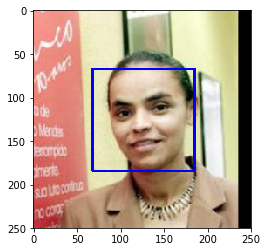

In [24]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [25]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

The percentage of human face detected in human dataset: 0.97

The percentage of human face detected in dog dataset: 0.16

In [7]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
detect_dog, detect_human = 0, 0
for human_image in human_files_short:
    if face_detector(human_image):
        detect_human+=1
for dog_image in dog_files_short:
    if face_detector(dog_image):
        detect_dog+=1


In [8]:
print("The percentage of human face detected in human dataset: {}".format(detect_human/len(human_files_short)))
print("The percentage of human face detected in dog dataset: {}".format(detect_dog/len(dog_files_short)))

The percentage of human face detected in human dataset: 0.97
The percentage of human face detected in dog dataset: 0.16


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [4]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # load color (BGR) image
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    img = Image.open(img_path)
    transformer = transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor()])
    img = transformer(img)
    img.unsqueeze_(0)

    VGG16.eval()
    pred = VGG16(img)
    pred = pred.cpu().detach().numpy()
    return np.argmax(pred) # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [6]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    pred = VGG16_predict(img_path)
    # print(pred)
    if 151<=pred<=268:
        return True
    return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
from tqdm import tqdm
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
detect_dog, detect_human = 0, 0
for human_image in tqdm(human_files_short,total=len(human_files_short)):
    if dog_detector(human_image):
        detect_human+=1
for dog_image in tqdm(dog_files_short,total = len(dog_files_short)):
    if dog_detector(dog_image):
        detect_dog+=1

100%|██████████| 100/100 [00:35<00:00,  2.85it/s]


In [15]:
print("The percentage of dog face detected in human dataset: {}".format(detect_human/len(human_files_short)))
print("The percentage of dog face detected in dog dataset: {}".format(detect_dog/len(dog_files_short)))

The percentage of dog face detected in human dataset: 0.0
The percentage of dog face detected in dog dataset: 0.85


__Answer:__ 

The percentage of dog face detected in human dataset: 0.0

The percentage of dog face detected in dog dataset: 0.85

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [7]:
import os
from torchvision import datasets
import torch
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_dir = r"dogImages/train"
val_dir = r"dogImages/valid"
test_dir = r"dogImages/test"

batch_size = 4
lr = 0.001
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_dataset = datasets.ImageFolder(train_dir, 
                                     transforms.Compose([transforms.Resize(256),
                                                         transforms.RandomResizedCrop(224),
                                                         transforms.RandomHorizontalFlip(),
                                                         transforms.ToTensor(),
                                                         normalize]))
val_dataset = datasets.ImageFolder(val_dir,
                                   transforms.Compose([transforms.Resize(256),
                                                      transforms.CenterCrop(224),
                                                      transforms.ToTensor(),
                                                      normalize]))
test_dataset = datasets.ImageFolder(test_dir,
                                   transforms.Compose([transforms.Resize(256),
                                                      transforms.CenterCrop(224),
                                                      transforms.ToTensor(),
                                                      normalize]))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,shuffle = True, pin_memory = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size,shuffle = False, pin_memory = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,shuffle = False, pin_memory = True)

loaders_scratch = {"train":train_loader, "valid":val_loader, "test":test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

1. Resize code by applying RandomResizedCrop to (224,224,3). The size is 224, which is a value picked by paper of VGG16.

2. Yes I use argumentation. RandomHorizontalFlip and cropping are introduced.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [8]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3,16,kernel_size = 3,stride=1,padding=0)
        self.conv2 = nn.Conv2d(16,32,kernel_size = 3,stride=1,padding=0)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=1, ceil_mode=True)
        self.conv3 = nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=0)
        self.conv4 = nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=0)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=1, ceil_mode=True)
        self.conv5 = nn.Conv2d(128,256,kernel_size = 3,stride=1,padding=2)
        self.conv6 = nn.Conv2d(256,256,kernel_size = 3,stride=1,padding=2)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=1, ceil_mode=True)
        self.dense = nn.Linear(256*9*9, 133)
    
    def forward(self, x):
        ## Define forward behavior
        out = F.relu(self.conv1(x))              # --> 224,224,16
        out = F.relu(self.conv2(out))            # --> 224,224,32
        out = self.pool1(out)                       # --> 112,112,32
        out = F.relu(self.conv3(out))            # --> 112,112,64
        out = self.pool2(out)                       # --> 56,56,64
        out = F.relu(self.conv4(out))            # --> 56,56,128
        out = self.pool2(out)                       # --> 28,28,128
        out = F.relu(self.conv5(out))            # --> 28,28,256
        out = self.pool3(out)                       # --> 14,14,256
        out = F.relu(self.conv6(out))            # --> 14,14,256
        out = self.pool3(out)                       # --> 7,7,256
        # print(out.shape)
        out = out.view(-1, 256*9*9)
        out = self.dense(out)
        return out

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

Here I build 3 blocks and each block covers 2 conv layers + 1 pooling layer. This is a typical combination for deep learning based classification application. 

Conv+pooling helps extract features. Yet it's not as strong as VGG16.

Finally I use a dense layer to combine previous feature map and use it to classify given image.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [9]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=lr)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [11]:
# the following import is required for training to be robust to truncated images
# revert code in train function back
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        train_item, val_item = 0, 0
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            pred = model(data)
            loss = criterion(pred, target)
            loss.backward()
            optimizer.step()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        train_item = batch_idx+1
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            pred = model(data)
            loss = criterion(pred, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
        val_item = batch_idx+1
        train_loss /= train_item
        valid_loss /= val_item
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
    # return trained model
    return model


# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pth')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pth'))

### Upload data to S3 and train a model from scratch with sagemaker instance 

Train.py, model.py and predict.py included in source_scratch_python folder

In [12]:
import pandas as pd
import boto3
import sagemaker
# session and role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# create an S3 bucket
bucket = sagemaker_session.default_bucket()

In [13]:
# should be the name of directory you created to save your features data
data_dir = "dogImages"

# set prefix, a descriptive name for a directory  
prefix = "dogImages"

# upload all data to S3
input_data = sagemaker_session.upload_data(path=data_dir, bucket=bucket, key_prefix=prefix)
print(input_data)

In [14]:
input_data = "s3://sagemaker-us-east-1-627003141521/dogImages"

In [ ]:
empty_check = []
for obj in boto3.resource('s3').Bucket(bucket).objects.all():
    empty_check.append(obj.key)
    print(obj.key)

assert len(empty_check) !=0, 'S3 bucket is empty.'
print('Test passed!')

In [70]:
# import a PyTorch wrapper
from sagemaker.pytorch import PyTorch

# specify an output path
# prefix is specified above
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate a pytorch estimator
estimator = PyTorch(entry_point='train.py',
                    source_dir='source_scratch_pytorch', # this should be just "source" for your code
                    role=role,
                    framework_version='1.0',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge',
                    output_path=output_path,
                    sagemaker_session=sagemaker_session,
                    hyperparameters={
                        'batch-size': 4,  # num of features
                        'lr': 0.001,
                        'epochs': 20 # could change to higher
                    })


In [29]:
output_path

's3://sagemaker-us-east-1-627003141521/dogImages'

In [71]:
%%time

# Train your estimator on S3 training data
estimator.fit({'train': input_data})

2020-04-26 00:31:32 Starting - Starting the training job...
2020-04-26 00:31:34 Starting - Launching requested ML instances.........
2020-04-26 00:33:06 Starting - Preparing the instances for training.........
2020-04-26 00:34:37 Downloading - Downloading input data.........
2020-04-26 00:36:13 Training - Downloading the training image..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-04-26 00:36:39,075 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-04-26 00:36:39,102 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-04-26 00:36:39,103 sagemaker_pytorch_container.training INFO     Invoking user training script.

2020-04-26 00:36:37 Training - Training image download completed. Training in progress.2020-04-26 00:36:54,585 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-04-26 00:36:54,5

Epoch: 1 #011Training Loss: 0.002852 #011Validation Loss: 0.022165
save model...
Epoch: 2 #011Training Loss: 0.002712 #011Validation Loss: 0.020649
save model...
Epoch: 3 #011Training Loss: 0.002648 #011Validation Loss: 0.020401
save model...
Epoch: 4 #011Training Loss: 0.002569 #011Validation Loss: 0.020043
save model...
Epoch: 5 #011Training Loss: 0.002512 #011Validation Loss: 0.019744
save model...
Epoch: 6 #011Training Loss: 0.002454 #011Validation Loss: 0.019225
save model...
Epoch: 7 #011Training Loss: 0.002396 #011Validation Loss: 0.019225
save model...
Epoch: 8 #011Training Loss: 0.002358 #011Validation Loss: 0.018440
save model...
Epoch: 9 #011Training Loss: 0.002315 #011Validation Loss: 0.018379
save model...
Epoch: 10 #011Training Loss: 0.002274 #011Validation Loss: 0.018159
save model...
Epoch: 11 #011Training Loss: 0.002235 #011Validation Loss: 0.017671
save model...
Epoch: 12 #011Training Loss: 0.002181 #011Validation Loss: 0.018015
Epoch: 13 #011Training Loss: 0.002160 #

In [72]:
estimator.model_data

's3://sagemaker-us-east-1-627003141521/dogImages/sagemaker-pytorch-2020-04-26-00-31-31-816/output/model.tar.gz'

In [14]:
estimator = estimator.attach("sagemaker-pytorch-2020-04-25-15-51-01-965")

2020-04-25 16:56:29 Starting - Preparing the instances for training
2020-04-25 16:56:29 Downloading - Downloading input data
2020-04-25 16:56:29 Training - Training image download completed. Training in progress.
2020-04-25 16:56:29 Uploading - Uploading generated training model
2020-04-25 16:56:29 Completed - Training job completedbash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-04-25 15:55:52,141 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-04-25 15:55:52,168 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-04-25 15:55:55,182 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-04-25 15:55:55,510 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-04-25 15:55:55,510 sagemaker-containers INFO     Generating setup.cfg
2020-04-25 15:55:55,511 sagemaker-conta

In [73]:
# importing PyTorchModel
from sagemaker.pytorch import PyTorchModel

# Create a model from the trained estimator data
# And point to the prediction script
model = PyTorchModel(model_data=estimator.model_data,
                     role = role,
                     framework_version='1.0',
                     entry_point='predict.py',
                     source_dir='source_scratch_pytorch')

In [74]:
%%time

# uncomment, if needed
# deploy your model to create a predictor
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

---------------!CPU times: user 477 ms, sys: 25.1 ms, total: 502 ms
Wall time: 7min 32s








### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [75]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        data = data.cpu().detach().numpy()
        # print(type(data),target)
        output = predictor.predict(data)
        pred = np.argmax(output,axis=1)
        # print(output.shape)
        # calculate the loss
        # print(type(output),type(target),target.shape,torch.from_numpy(output).shape)
        loss = criterion(torch.from_numpy(output), target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        # pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label

        correct += np.sum(pred == target.numpy())
        total += data.shape[0]
        
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.247814


Test Accuracy: 23% (194/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
## TODO: Specify data loaders
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_dir = r"dogImages/train"
val_dir = r"dogImages/valid"
test_dir = r"dogImages/test"

batch_size = 4
lr = 0.001
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
train_dataset = datasets.ImageFolder(train_dir, 
                                     transforms.Compose([transforms.Resize(256),
                                                         transforms.RandomResizedCrop(224),
                                                         transforms.RandomHorizontalFlip(),
                                                         transforms.ToTensor(),
                                                         normalize]))
val_dataset = datasets.ImageFolder(val_dir,
                                   transforms.Compose([transforms.Resize(256),
                                                      transforms.CenterCrop(224),
                                                      transforms.ToTensor(),
                                                      normalize]))
test_dataset = datasets.ImageFolder(test_dir,
                                   transforms.Compose([transforms.Resize(256),
                                                      transforms.CenterCrop(224),
                                                      transforms.ToTensor(),
                                                      normalize]))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,shuffle = True, pin_memory = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size,shuffle = False, pin_memory = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,shuffle = False, pin_memory = True)

loaders_scratch = {"train":train_loader, "val":val_loader, "test":test_loader}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)
print(model_transfer)
if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

To exploit the power of transfer learning, I selected VGG19. VGG19 is a strong baseline for image classification problem. By using pretrain weights, we are able to quickly pick up model's power and get satisfying results. However, VGG19 has a different class number as compared with ours. So we replace it with current number of class accordingly.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [17]:
criterion_scratch = nn.CrossEntropyLoss()
optimizer_scratch = optim.SGD(model_transfer.parameters(), lr=lr)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [18]:
# import a PyTorch wrapper
from sagemaker.pytorch import PyTorch

# specify an output path
# prefix is specified above
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate a pytorch estimator
estimator = PyTorch(entry_point='train.py',
                    source_dir='source_transfer_pytorch', # this should be just "source" for your code
                    role=role,
                    framework_version='1.0',
                    train_instance_count=1,
                    train_instance_type='ml.p2.xlarge', # GPU enabled
                    output_path=output_path,
                    sagemaker_session=sagemaker_session,
                    hyperparameters={
                        'batch-size': 4,  # num of features
                        'lr': 0.001,
                        'epochs': 20 # could change to higher
                    })



In [ ]:
%%time

# Train your estimator on S3 training data
estimator.fit({'train': input_data})

2020-04-26 02:50:23 Starting - Starting the training job...
2020-04-26 02:50:24 Starting - Launching requested ML instances......
2020-04-26 02:51:30 Starting - Preparing the instances for training......
2020-04-26 02:52:41 Downloading - Downloading input data............
2020-04-26 02:54:50 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-04-26 02:54:51,990 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-04-26 02:54:52,016 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-04-26 02:54:55,027 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-04-26 02:54:55,382 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-04-26 02:54:55,383 sagemaker-containers INFO     Generating setup.cfg
2020-04-26 0

Using device cuda.
Get data loader.
Epoch: 1 #011Training Loss: 0.001362 #011Validation Loss: 0.003502
Epoch: 2 #011Training Loss: 0.000786 #011Validation Loss: 0.003292
Epoch: 3 #011Training Loss: 0.000690 #011Validation Loss: 0.002445


In [19]:
estimator = estimator.attach("sagemaker-pytorch-2020-04-26-02-50-23-081")

2020-04-26 06:24:16 Starting - Preparing the instances for training
2020-04-26 06:24:16 Downloading - Downloading input data
2020-04-26 06:24:16 Training - Training image download completed. Training in progress.
2020-04-26 06:24:16 Uploading - Uploading generated training model
2020-04-26 06:24:16 Completed - Training job completedbash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-04-26 02:54:51,990 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-04-26 02:54:52,016 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-04-26 02:54:55,027 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-04-26 02:54:55,382 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-04-26 02:54:55,383 sagemaker-containers INFO     Generating setup.cfg
2020-04-26 02:54:55,383 sagemaker-conta

Training seconds: 12695
Billable seconds: 12695


In [24]:
estimator.model_data

's3://sagemaker-us-east-1-627003141521/dogImages/sagemaker-pytorch-2020-04-26-02-50-23-081/output/model.tar.gz'

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [21]:
# importing PyTorchModel
from sagemaker.pytorch import PyTorchModel

# Create a model from the trained estimator data
# And point to the prediction script
model = PyTorchModel(model_data=estimator.model_data,
                     role = role,
                     framework_version='1.0',
                     entry_point='predict.py',
                     source_dir='source_transfer_pytorch')

In [ ]:
%%time

# uncomment, if needed
# deploy your model to create a predictor
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

--------

In [26]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        data = data.cpu().detach().numpy()
        # print(type(data),target)
        output = predictor.predict(data)
        pred = np.argmax(output,axis=1)
        # print(output.shape)
        # calculate the loss
        # print(type(output),type(target),target.shape,torch.from_numpy(output).shape)
        loss = criterion(torch.from_numpy(output), target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        # pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label

        correct += np.sum(pred == target.numpy())
        total += data.shape[0]
        
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [28]:
loaders_transfer = loaders_scratch
criterion_transfer = criterion_scratch

In [39]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.471679


Test Accuracy: 86% (720/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    img = Image.open(img_path)
    transformer = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    img = transformer(img).numpy()
    output = predictor.predict(img[np.newaxis,...])
    output = np.argmax(output,axis=1)
    return class_names[output[0]] # predicted class index

In [30]:
len(class_names)

133

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [33]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    ## 3 cases, detect person / detect dog or nothing found
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if face_detector(img_path):
        print("Human detected in the image! ")
    elif predict_breed_transfer(img_path):
        print("Dog detected in the image! ")
    else:
        print("No human or dog detected in the image! ")
    return
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is better than I expected.

To improve, I think it will be better if,
1. Train with more epochs as the model still seems to be kind of underfit, also try to verify if optimizer is suitable.
2. Pictures of dogs and human face are quite common. Maybe we need to introduce more pictures and then try more complex architecture.
3. As we fine tune with single class, it may lead to overfitting and kind of data imbalance. Some pre-stop technique can be introduced for such situation.

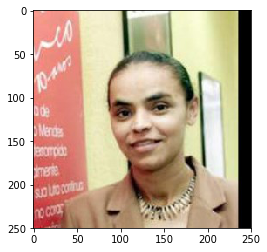

Human detected in the image! 


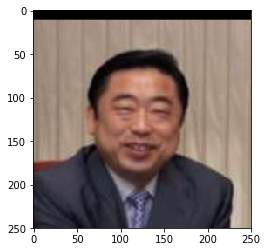

Human detected in the image! 


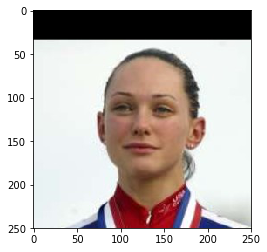

Human detected in the image! 


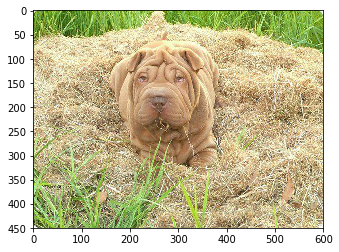

Dog detected in the image! 


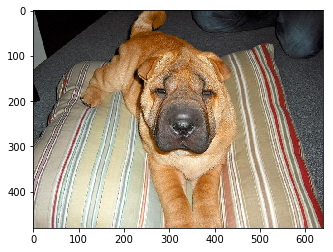

Dog detected in the image! 


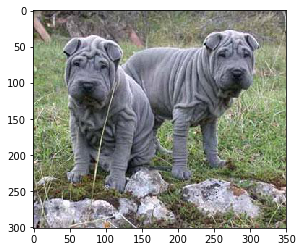

Dog detected in the image! 


In [34]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)